# Analysis of Text Matching Data Generated from JSTOR Dataset 

### Table of Contents

- [Author and title references in *Victorian Studies*](#Author-and-title-references-in-Victorian-Studies)
- [*Middlemarch* statistics](#Middlemarch-statistics)
    - [Generating *Middlemarch* chapter and book locations](#Generating-Middlemarch-chapter-and-book-locations)
- [Statistics on our JSTOR dataset](#Statistics-on-our-dataset-of-JSTOR-matches)
    - [Data Dictionary for text matcher dataset](#Data-Dictionary-for-text-matcher-dataset)
    - [How many quotations do we have?](#How-many-quotations-do-we-have?)
    - [How many total articles do we have?](#How-many-total-articles-do-we-have?)
    - [How many articles with matches do we have?](#How-many-articles-with-matches-do-we-have?)
    - [How many articles do we have published in each year?](#How-many-articles-do-we-have-published-in-each-year?)
    - [Number of non-matches in the 6,069-article dataset](#Number-of-non-matches-in-the-6,069-article-dataset)
    - [Average numbers of quoted words per item](#Average-numbers-of-quoted-words-per-item)
    - [Average numbers of quoted words per match, per item](#Average-number-of-words-per-match,-per-item)
    - [Quotation length statistics](#Quotation-Length-Statistics)
- [Functions for extracting wordcounts, numbers of quotations for diachronic and synchronic analysis](#Functions-for-extracting-wordcounts,-numbers-of-quotations-for-diachronic-and-synchronic-analysis)
- [Synchronic Analysis](#Synchronic-Analysis) 
    - [Quotations and words quoted per book in *Middlemarch*](#Quotations-and-words-quoted-per-book-in-Middlemarch)
    - [Quotations and words quoted by chapter in *Middlemarch*](#Quotations-and-words-quoted-by-chapter-in-Middlemarch)
- [Diachronic Analysis](#Diachronic-Analysis) 
    - [*Middlemarch* diachronic analysis: quotations per book, by decade](#Middlemarch-diachronic-analysis:-quotations-per-book,-by-decade)
    - [*Middlemarch* diachronic analysis: quotations per chapter, by decade](#Middlemarch-diachronic-analysis:-quotations-per-chapter,-by-decade)
        - [*Middlemarch* top 5 most frequently quoted chapters, line chart](#Middlemarch-top-5-most-frequently-quoted-chapters,-line-chart)
- [*Middlemarch* chapter-specific analysis](#Middlemarch-chapter-specific-analysis)
    - [Chapter 15](#Chapter-15)
    - [Chapter 20](#Chapter-20)
- [*Middlemarch* quotations, by journal](#Middlemarch-quotations,-by-journal)
    - [Descriptive statistics on journals in JSTOR dataset](#Descriptive-statistics-on-journals-in-JSTOR-dataset)
    - [*Middlemarch* quotations per chapter, by journal, stacked bar chart](#Middlemarch-quotations-per-chapter,-by-journal,-stacked-bar-chart)
    - [*George Eliot - George Henry Lewes Studies (GE-GHLS)*](#George-Eliot---George-Henry-Lewes-Studies-(GE-GHLS))
    - [*Victorian Studies*](#Victorian-Studies)
    - [All Victorianist journals](#All-Victorianist-journals)
        - [Most distinctive words: Victorianist journals vs. non-Victorianist journals](#Most-Distinctive-Words:-Victorianist-Journals-vs.-Non-Victorianist-Journals) 
- [Evaluation](#Evaluation)
    - [ Generating samples of dataset for evaluating the precision and recall of text-matcher](#Generating-samples-of-dataset-for-evaluating-the-precision-and-recall-of-text-matcher)
    - [Link to evaluation metrics notebook](#Link-to-evaluation-metrics-notebook)
- [Figures for "What We Quote: Disciplinary History and the Textual Atmospheres of *Middlemarch*" article](#Figures-for-"What-We-Quote:-Disciplinary-History-and-the-Textual-Atmospheres-of-Middlemarch"-article)
    - [Figure 1](#Figure-1)
    - [Figure 2](#Figure-2)
    - [Figure 3](#Figure-3)
    - [Figure 4](#Figure-4)
    - [Figure 5](#Figure-5)
    - [Figure 6](#Figure-6)
    - [Figure 7](#Figure-7)

In [3]:
import pandas as pd
import numpy as np
#import spacy
import re
import json
import altair as alt
#new viz library for single-column heatmap
import matplotlib.pyplot as plt
# import seaborn as sns
#sns.set()
#from nltk.corpus import names
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 6]
plt.style.use('ggplot')

## Author and title references in *Victorian Studies*

- [Most frequent author references in *Victorian Studies*](#Most-frequent-author-references-in-Victorian-Studies)
    - [Most frequent author references in *Victorian Studies*, line chart](#Most-frequent-author-references-in-Victorian-Studies,-line-chart)
	- [Most frequent author references in *Victorian Studies*, line chart (color)](#Most-frequent-author-references-in-Victorian-Studies,-line-chart-(color))
- [Most frequent title references in *Victorian Studies*](#Most-frequent-title-references-in-Victorian-Studies)
	- [Most frequent title references in *Victorian Studies*, line chart](#Most-frequent-title-references-in-Victorian-Studies,-line-chart)
    - [Most frequent title references in *Victorian Studies*, line chart (color)](#Most-frequent-title-references-in-Victorian-Studies,-line-chart-(color))


### Most frequent author references in *Victorian Studies*

In [6]:
vs_authors_df = pd.read_csv("../data/VS-author-term_frequencies.csv")

In [7]:
vs_authors_df

Author      1960s      1970s      1980s      1990s      2000s      2010s
0   Bronte   4.238259  10.292524  11.409396  11.659514   8.901252   0.122175
1  Dickens  25.429553  29.902492  30.285235  25.894134  25.173853  25.656689
2    Eliot  21.534937  23.618635  29.194631  22.031474  23.922114  22.052535
3    Hardy  15.349370  23.185265  20.805369  15.021459   9.805285  11.484423

In [8]:
vs_authors_df = vs_authors_df.melt(id_vars=["Author"], 
        var_name = "Decade",
                                   value_name="Percentage_of_Documents")

In [9]:
vs_authors_df

Author Decade  Percentage_of_Documents
0    Bronte  1960s                 4.238259
1   Dickens  1960s                25.429553
2     Eliot  1960s                21.534937
3     Hardy  1960s                15.349370
4    Bronte  1970s                10.292524
5   Dickens  1970s                29.902492
6     Eliot  1970s                23.618635
7     Hardy  1970s                23.185265
8    Bronte  1980s                11.409396
9   Dickens  1980s                30.285235
10    Eliot  1980s                29.194631
11    Hardy  1980s                20.805369
12   Bronte  1990s                11.659514
13  Dickens  1990s                25.894134
14    Eliot  1990s                22.031474
15    Hardy  1990s                15.021459
16   Bronte  2000s                 8.901252
17  Dickens  2000s                25.173853
18    Eliot  2000s                23.922114
19    Hardy  2000s                 9.805285
20   Bronte  2010s                 0.122175
21  Dickens  2010s                25.656689
22    Eliot  2010s                22.052535
23    Hardy  2010s                11.484423

In [10]:
vs_authors_df['Percentage_of_Documents'] = vs_authors_df['Percentage_of_Documents']* 0.01

In [11]:
line = alt.Chart(vs_authors_df, title="Frequency of author references in *Victorian Studies*").mark_line().encode(
    x=alt.X('Decade', title="Decade",type='ordinal', sort='ascending', 
                                                            axis=alt.Axis(labelAngle=0, labelExpr='datum.value')), 
    y=alt.Y('Percentage_of_Documents:Q', title="Percent of Documents", axis=alt.Axis(labelAngle=0, format="%")),
    color=alt.Color('Author:O', scale=alt.Scale(scheme='greys'),legend=None),
)

points = line.mark_point(filled=True).encode(
    color=alt.Color('Author:O', scale=alt.Scale(scheme='greys')),
    shape=alt.Shape('Author:O', scale=alt.Scale(range=[ 'circle', 'cross', 'square', 'triangle-right', 'diamond'])),
    size=alt.Size('Author:O', legend=None, scale=alt.Scale(range=[200,200],domain=['Eliot', 'Dickens', 'Bronte', 'Hardy']))
)

auth_chart = alt.layer(
    line,
    points
).resolve_scale(
    color='independent',
    shape='independent'
).properties(width=400).configure_legend(
titleFontSize=11,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
)

### Most frequent author references in *Victorian Studies*, line chart

In [12]:
auth_chart#.save('Figure-1.png', ppi=300)

alt.LayerChart(...)

In [13]:
line = alt.Chart(vs_authors_df, title="Frequency of author references in *Victorian Studies*").mark_line().encode(
    x=alt.X('Decade', title="Decade",type='ordinal', sort='ascending', 
                                                            axis=alt.Axis(labelAngle=0, labelExpr='datum.value')), 
    y=alt.Y('Percentage_of_Documents:Q', title="Percent of Documents", axis=alt.Axis(labelAngle=0, format="%")),
    color=alt.Color('Author:O', scale=alt.Scale(scheme='category20'),legend=None),
)

points = line.mark_point(filled=True).encode(
    color=alt.Color('Author:O', scale=alt.Scale(scheme='category20')),
    shape=alt.Shape('Author:O', scale=alt.Scale(range=[ 'circle', 'cross', 'square', 'triangle-right', 'diamond'])),
    size=alt.Size('Author:O', legend=None, scale=alt.Scale(range=[200,200],domain=['Eliot', 'Dickens', 'Bronte', 'Hardy']))
)

auth_chart_color = alt.layer(
    line,
    points
).resolve_scale(
    color='independent',
    shape='independent'
).properties(width=400).configure_legend(
titleFontSize=11,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
)


### Most frequent author references in *Victorian Studies*, line chart (color)

In [14]:
auth_chart_color

alt.LayerChart(...)

### Most frequent title references in *Victorian Studies*

In [15]:
vs_titles_df = pd.read_csv("../data/VS-title-term_frequencies.csv")

In [16]:
vs_titles_df

Title     1960s     1970s     1980s     1990s     2000s  \
0         Bleak House  4.238259  4.875406  4.697987  5.007153  5.354659   
1   David Copperfield  3.207331  3.575298  5.956376  4.220315  2.781641   
2  Great Expectations  3.436426  3.575298  3.104027  4.363376  3.268428   
3         Middlemarch  5.841924  6.500542  7.214765  5.865522  5.632823   

      2010s  
0  4.825901  
1  3.359805  
2  2.871106  
3  6.536347

In [17]:
vs_titles_df = vs_titles_df.melt(id_vars=["Title"], 
        var_name = "Decade",
                                   value_name="Percentage_of_Documents")

In [18]:
vs_titles_df['Percentage_of_Documents'] = vs_titles_df['Percentage_of_Documents']* 0.01

In [19]:
line = alt.Chart(vs_titles_df, title="Frequency of title references in *Victorian Studies*").mark_line().encode(
    x=alt.X('Decade', title="Decade",type='ordinal', sort='ascending', 
                                                            axis=alt.Axis(labelAngle=0, labelExpr='datum.value')), 
    y=alt.Y('Percentage_of_Documents:Q', title="Percent of Documents", axis=alt.Axis(labelAngle=0, format="%")),
    color=alt.Color('Title:O', scale=alt.Scale(scheme='greys'),legend=None),
)

points = line.mark_point(filled=True).encode(
    color=alt.Color('Title:O', scale=alt.Scale(scheme='greys')),
    shape=alt.Shape('Title:O', scale=alt.Scale(range=[ 'circle', 'cross', 'triangle-right', 'square','diamond'])),
    size=alt.Size('Title:O', legend=None, scale=alt.Scale(range=[200,200],domain=['Bleak House', 'David Copperfield', 'Middlemarch','Great Expectations', ]))
)

title_chart = alt.layer(
    line,
    points
).resolve_scale(
    color='independent',
    shape='independent'
).properties(width=400).configure_legend(
titleFontSize=11,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
)

### Most frequent title references in *Victorian Studies*, line chart

In [20]:
title_chart#.save('Figure-2.png', ppi=300)

alt.LayerChart(...)

In [21]:
line = alt.Chart(vs_titles_df, title="Frequency of title references in *Victorian Studies*").mark_line().encode(
    x=alt.X('Decade', title="Decade",type='ordinal', sort='ascending', 
                                                            axis=alt.Axis(labelAngle=0, labelExpr='datum.value')), 
    y=alt.Y('Percentage_of_Documents:Q', title="Percent of Documents", axis=alt.Axis(labelAngle=0, format="%")),
    color=alt.Color('Title:O', scale=alt.Scale(scheme='category20'),legend=None),
)

points = line.mark_point(filled=True).encode(
    color=alt.Color('Title:O', scale=alt.Scale(scheme='category20')),
    shape=alt.Shape('Title:O', scale=alt.Scale(range=[ 'circle', 'cross', 'triangle-right', 'square','diamond'])),
    size=alt.Size('Title:O', legend=None, scale=alt.Scale(range=[200,200],domain=['Bleak House', 'David Copperfield', 'Middlemarch','Great Expectations', ]))
)

title_chart_color = alt.layer(
    line,
    points
).resolve_scale(
    color='independent',
    shape='independent'
).properties(width=400).configure_legend(
titleFontSize=11,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
)


### Most frequent title references in *Victorian Studies*, line chart (color)

In [22]:
title_chart_color

alt.LayerChart(...)

## *Middlemarch* statistics

### Generating *Middlemarch* chapter and book locations 
Here, we're using the [Project Gutenberg text of *Middlemarch*](https://www.gutenberg.org/cache/epub/145/pg145.txt), with one modification: the phrase "Book 1" has been moved to appear before the prelude, marking that the "Prelude" is indeed part of the text that appeared with Book 1.

In [19]:
with open('../middlemarch.txt') as f: 
    mm = f.read()

In [20]:
textALength = len(mm) 

In [21]:
# Get chapter locations
chapterMatches = re.finditer('PRELUDE|CHAPTER|FINALE', mm)
chapterLocations = [match.start() for match in chapterMatches]
chapterLocations.append(textALength) # Add one to account for last chunk. 
len(chapterLocations)

89

In [22]:
# Get paragraph locations
paragraphMatches = re.finditer('\n\n', mm)
paragraphLocations = [match.start() for match in paragraphMatches]
paragraphLocations.append(textALength)
len(paragraphLocations)

4890

In [23]:
# Get book locations
bookLocations = [match.start() for match in re.finditer('\nBOOK', mm)]
bookLocations = [0] + bookLocations + [textALength] # Add one to account for last chunk.
bookLocations

[0, 38, 250307, 481579, 681858, 915901, 1138247, 1364956, 1571148, 1793449]

In [24]:
def getChapters(text): 
    chapters = []
    for i, loc in enumerate(chapterLocations): 
        if i != len(chapterLocations)-1: 
            chapter = mm[loc:chapterLocations[i+1]]
            chapters.append(chapter)
    return chapters

<Axes: title={'center': 'Middlemarch Chapter Lengths'}>

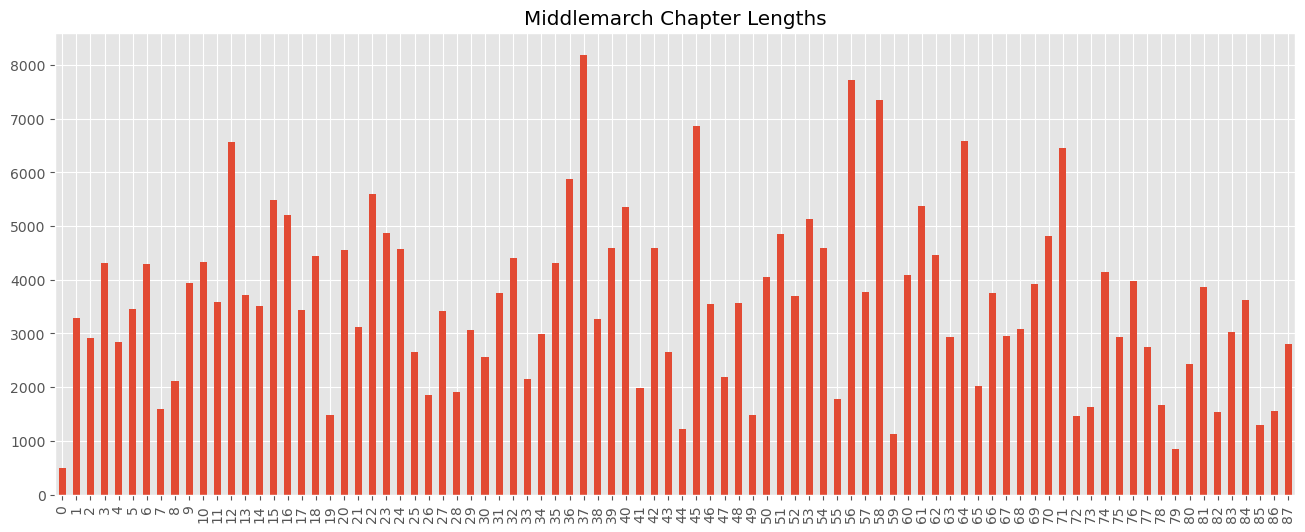

In [25]:
chapters = getChapters(mm)
chapterLengths = [len(chapter.split()) for chapter in chapters]
chapterLengthsSeries = pd.Series(chapterLengths)
chapterLengthsSeries.plot(kind='bar', title='Middlemarch Chapter Lengths')

In [26]:
def getParagraphs(text): 
    paragraphs = []
    for i, loc in enumerate(paragraphLocations): 
        if i != len(paragraphLocations)-1: 
            paragraph = mm[loc:paragraphLocations[i+1]]
            paragraphs.append(paragraph)
    return paragraph

In [27]:
paragraphs = getParagraphs(mm)
paragraphLengths = [len(paragraph.split()) for paragraph in paragraphs]
paragraphLengthsSeries = pd.Series(paragraphLengths)

In [28]:
paragraphs

'\n\nHer finely touched spirit had still its fine issues, though they were\nnot widely visible.  Her full nature, like that river of which Cyrus\nbroke the strength, spent itself in channels which had no great name on\nthe earth.  But the effect of her being on those around her was\nincalculably diffusive: for the growing good of the world is partly\ndependent on unhistoric acts; and that things are not so ill with you\nand me as they might have been, is half owing to the number who lived\nfaithfully a hidden life, and rest in unvisited tombs.\n'

## Statistics on our dataset of JSTOR matches

### Read in our ` text-matcher` JSTOR data 
Here, we're reading in the output of our text-matcher on our JSTOR data (in JSON format)

In [29]:
df = pd.read_json('../data/t2-c3-n2-m3-no-stops.json') 

In [30]:
df

creator datePublished        docSubType  docType  \
0                [Rainer Emig]    2006-01-01       book-review  article   
1               [Martin Green]    1970-01-01       book-review  article   
2              [Richard Exner]    1982-01-01       book-review  article   
3      [Ruth Evelyn Henderson]    1925-10-01  research-article  article   
4                [Alan Palmer]    2011-12-01  research-article  article   
...                        ...           ...               ...      ...   
5879  [Michaela Giesenkirchen]    2005-10-01  research-article  article   
5880           [Leon Botstein]    2005-07-01              misc  article   
5881         [Linda M. Shires]    2013-01-01  research-article  article   
5882         [Edward H. Cohen]    1990-07-01              misc  article   
5883                      None    1964-06-01              misc  article   

                                                     id  \
0                  http://www.jstor.org/stable/41158244   
1                   http://www.jstor.org/stable/3722819   
2                  http://www.jstor.org/stable/40137021   
3                    http://www.jstor.org/stable/802346   
4     http://www.jstor.org/stable/10.5325/style.45.4...   
...                                                 ...   
5879               http://www.jstor.org/stable/27747183   
5880                http://www.jstor.org/stable/4123220   
5881               http://www.jstor.org/stable/24575734   
5882                http://www.jstor.org/stable/3827815   
5883                http://www.jstor.org/stable/2932781   

                                             identifier  \
0     [{'name': 'issn', 'value': '03402827'}, {'name...   
1     [{'name': 'issn', 'value': '00267937'}, {'name...   
2     [{'name': 'issn', 'value': '01963570'}, {'name...   
3     [{'name': 'issn', 'value': '00138274'}, {'name...   
4     [{'name': 'issn', 'value': '00394238'}, {'name...   
...                                                 ...   
5879  [{'name': 'issn', 'value': '15403084'}, {'name...   
5880  [{'name': 'issn', 'value': '00274631'}, {'name...   
5881  [{'name': 'issn', 'value': '10601503'}, {'name...   
5882  [{'name': 'issn', 'value': '00425222'}, {'name...   
5883  [{'name': 'issn', 'value': '00290564'}, {'name...   

                               isPartOf issueNumber language  \
0     Amerikastudien / American Studies           3    [eng]   
1            The Modern Language Review           1    [eng]   
2                World Literature Today           1    [eng]   
3                   The English Journal           8    [eng]   
4                                 Style           4    [eng]   
...                                 ...         ...      ...   
5879          American Literary Realism           1    [eng]   
5880              The Musical Quarterly           2    [eng]   
5881   Victorian Literature and Culture           4    [eng]   
5882                  Victorian Studies           4    [eng]   
5883         Nineteenth-Century Fiction           1    [eng]   

                              outputFormat  ...  \
0               [unigram, bigram, trigram]  ...   
1               [unigram, bigram, trigram]  ...   
2               [unigram, bigram, trigram]  ...   
3     [unigram, bigram, trigram, fullText]  ...   
4               [unigram, bigram, trigram]  ...   
...                                    ...  ...   
5879            [unigram, bigram, trigram]  ...   
5880            [unigram, bigram, trigram]  ...   
5881            [unigram, bigram, trigram]  ...   
5882            [unigram, bigram, trigram]  ...   
5883            [unigram, bigram, trigram]  ...   

                                                  title  \
0                                        Review Article   
1                                        Review Article   
2                                        Review Article   
3     American Education Week--November 16-22; Some ...   
4             Rejoinder to 

In [31]:
df.to_csv('../data/matches.csv', encoding='utf-8')

In [32]:
# New for JSTOR 2022 data
df['year'] = pd.DatetimeIndex(df['datePublished']).year

In [33]:
# New for JSTOR 2022 data
df['year']

0       2006
1       1970
2       1982
3       1925
4       2011
        ... 
5879    2005
5880    2005
5881    2013
5882    1990
5883    1964
Name: year, Length: 5884, dtype: int64

In [34]:
df['Decade'] = df['year'] - (df['year'] % 10)
# df['Locations in A'] = df['matches'].apply(lambda x: x[1])
# df['NumMatches'] = df['matches'].apply(lambda x: x[0])

### Data Dictionary for `text matcher` dataset

Our text-matcher dataset includes the following fields:

| Data field | Definition |
| :------------- | :------------- |
| 'Locations in A' | index characters for start and end locations for quoted text in source text (A) [Middlemarch], generated by text-matcher  |
| 'Locations in B' | index characters for start and end locations for quoted text in the target text (B) [a given JSTOR text], generated by text-matcher  |
| 'author' | author name supplied by JSTOR |
| 'coverdate'|  date on cover, supplied by JSTOR |
| 'disc_name' | tags assigned to article, supplied by JSTOR |
| 'doi' |  text (DOI), supplied by JSTOR |
| 'id' |  unique identifier, supplied by JSTOR |
| 'jcode' |  shortcode for journal, supplied by JSTOR |
| 'journal' |  journal title, supplied by JSTOR |
| 'la' | language, supplied by JSTOR |
| 'no' | issue or number,  supplied by JSTOR |
| 'numMatches'| number of matches, generated by text-matcher |
| 'pages' |  page numbers, supplied by JSTOR |
| 'publisher_name' |  supplied by JSTOR |
| 'sp' |  starting page number, supplied by JSTOR |
| 'srcHtml' |  HTML version of source citation (journal, Volume, issue, date) supplied by JSTOR |
| 'title' |  title of article or piece of writing, supplied by JSTOR |
| 'topics' |  subject headings, supplied by JSTOR |
| 'ty' |  item type (fla = full length article; brv = book review; edi = opinion piece; nws OR mis) = other items, supplied by JSTOR |
| 'vo' | journal volume, supplied by JSTOR |
| 'year' |  year of publication, supplied by JSTOR |
| 'Decade' | decade, generated by Middlematch team from 'year' |
| 'Quoted Words' | total number of words in all quotations in that text, generated by generated by Middlematch team from "Locations in A' |
| 'Locations in A with Wordcounts' | list of pairs of index characters for start and end quote in the source text (A) [Middlemarch] and wordcount for each quoation, generated by generated by Middlematch team from "Locations in A' |
| 'Wordcounts' | list of wordcounts for each matched quotation, generated by text-matcher | 

In [35]:
df.columns

Index(['creator', 'datePublished', 'docSubType', 'docType', 'id', 'identifier',
       'isPartOf', 'issueNumber', 'language', 'outputFormat', 'pageCount',
       'pageEnd', 'pageStart', 'pagination', 'provider', 'publicationYear',
       'publisher', 'sourceCategory', 'tdmCategory', 'title', 'url',
       'volumeNumber', 'wordCount', 'numMatches', 'Locations in A',
       'Locations in B', 'abstract', 'keyphrase', 'subTitle', 'year',
       'Decade'],
      dtype='object')

### Functions for extracting wordcounts, numbers of quotations for diachronic and synchronic analysis

In [36]:
def diachronicAnalysis(df, decades=(1950, 2020), bins=chapterLocations, useWordcounts=True, normalize=True):
    """ Turning on useWordcounts makes it so that it's weighted by wordcount. 
    Turning it off uses raw numbers of quotations. """
    decades = np.arange(decades[0], decades[1], 10)
    # Make a dictionary of decades. 
    # Values are a list of locations.  
    decadeDict = {}
    for i, row in df.iterrows():
        decade = row['Decade']
        locationsAndWordcounts = row['Locations in A with Wordcounts']
        if decade not in decadeDict: 
            decadeDict[decade] = locationsAndWordcounts.copy()
        else: 
            decadeDict[decade] += locationsAndWordcounts.copy()
    # Grab the beginnings of quotes. 
    decadeStartsWeights = {decade: [(item[0][0], item[1]) 
                                    for item in loc] 
                    for decade, loc in decadeDict.items()}
    if useWordcounts: 
        decadesBinned = {decade: 
                     np.histogram([loc[0] for loc in locations], 
                                  bins=bins,
                                  weights=[loc[1] for loc in locations],
                                  range=(0, textALength))[0]
                     for decade, locations in decadeStartsWeights.items() 
                         if decade in decades}
    else: 
        decadesBinned = {decade: 
                     np.histogram([loc[0] for loc in locations], 
                                  bins=bins,
                                  range=(0, textALength))[0]
                     for decade, locations in decadeStartsWeights.items() 
                         if decade in decades}
    decadesDF = pd.DataFrame(decadesBinned).T
    #Normalize
    if normalize: 
        decadesDF = decadesDF.div(decadesDF.max(axis=1), axis=0)
    return decadesDF

def countWords(locRange): 
    """ Counts words in middlemarch, given character ranges. """
    chunk = mm[locRange[0]:locRange[1]]
    return len(chunk.split())

def totalWords(locRangeSet): 
    """ Counts total words in a list of location ranges. """
    return sum([countWords(locRange) for locRange in locRangeSet])    
    
def countsPerSet(locRangeSet): 
    """ Returns an augmented location range set that includes word counts. """
    return [(locRange, countWords(locRange))
             for locRange in locRangeSet]
    
def extractWordcounts(locsAndWordcounts): 
    """ 
    Takes pairs of location ranges and wordcounts, 
    and returns just the wordcounts. 
    """
    return [item[1] for item in locsAndWordcounts 
            if len(locsAndWordcounts) > 0]

def synchronicAnalysis(df, bins=chapterLocations, useWordcounts=True): 
    locs = df['Locations in A'].values
    locCounts = [(loc, countWords(loc)) for locSet in locs
              for loc in locSet]
    starts = [loc[0][0] for loc in locCounts]
    counts = [loc[1] for loc in locCounts]
    if useWordcounts: 
        binned = np.histogram(starts, bins=bins, 
                              weights=counts, range=(0, textALength))
    else: 
        binned = np.histogram(starts, bins=bins, 
                              range=(0, textALength))
    binnedDF = pd.Series(binned[0])
    return binnedDF

def plotDiachronicAnalysis(df, save=False, reverse=False): 
    ylabels = [str(int(decade)) for decade in df.index] + ['2020']
    plt.pcolor(df, cmap='gnuplot')
    plt.yticks(np.arange(len(df.index)+1), ylabels)
    plt.gca().invert_yaxis()
    plt.ylabel('Decade')
    plt.xlabel('Chapter')
    plt.gca().set_xlim((0, len(df.T)))
    plt.colorbar(ticks=[])
    if save: 
        plt.savefig('diachronic.png', bboxinches='tight', dpi=300, transparent=True)
    plt.show()
    
def plotSynchronicAnalysis(s, useWordcounts=True): 
    ax = s.plot(kind='bar')
    ax.set_xlabel('Chapter')
    if useWordcounts: 
        ax.set_ylabel('Number of Words Quoted')
    else: 
        ax.set_ylabel('Number of Quotations')
        
def plotSynchronicAnalysisHeatmap(s, useWordcounts=True): 
    vec1=synchronicAnalysis(df, useWordcounts=False)
    fig, ax = plt.subplots()
    sns.color_palette("magma")
    sns.heatmap([vec1])
    ax.set_xlabel('Chapter')
    ax.set_ylabel('Number of Quotations')
    
def plotDiachronicAnalysisBubble(df, save=False, reverse=False):
    ylabels = [str(int(decade)) for decade in df.index] + ['2020'] 
    alt.Chart(df).mark_circle().encode(
    x='Chapter',
    y='Decade',
    size='sum(count):Q'
)

### Adding additional rows to DataFrame

In [37]:
df['Quoted Words'] = df['Locations in A'].apply(totalWords)

In [38]:
df['Locations in A with Wordcounts'] = df['Locations in A'].apply(countsPerSet)

In [39]:
df['Wordcounts'] = df['Locations in A with Wordcounts'].apply(extractWordcounts)

In [40]:
# Verify that the diachronic wordcounts are the same as the synchronic wordcounts
decadeSums = diachronicAnalysis(df, decades=(1700, 2020), useWordcounts=True, normalize=False).sum(axis=1)
decadeSums.sum()

119747

In [41]:
chapterSums = synchronicAnalysis(df)
chapterSums.sum()

119892

### How many quotations do we have?

In [42]:
sum([len(item) for item in df['Locations in A'].values])

3800

#### Total number of matches

In [43]:
allMatches = []
for group in df['Locations in A'].values: 
    for pair in group: 
        allMatches.append(pair)

In [44]:
len(allMatches)

3800

### How many total articles do we have? 

In [45]:
print("Total articles with 'Middlemarch' appearing somewhere in text or metadata:")
len(df) # Total articles with "Middlemarch" mentioned somewhere

Total articles with 'Middlemarch' appearing somewhere in text or metadata:


5884

Find only those with non-trivial quotations from Middlemarch: 

In [46]:
articlesWithMatches = df[df['Locations in A'].apply(lambda x: len(x) > 0)]
articlesWithMatches.year.describe()

count    1540.000000
mean     1991.488961
std        19.713886
min      1900.000000
25%      1980.000000
50%      1994.000000
75%      2007.000000
max      2022.000000
Name: year, dtype: float64

### How many articles with matches do we have? 

In [47]:
print("Number of articles with matches to text in 'Middlemarch':")
articlesWithMatches['Locations in A'].count()

Number of articles with matches to text in 'Middlemarch':


1540

In [ ]:
articlesWithMatches['isPartOf'].value_counts()[:300]

In [48]:
articlesWithMatches['docType'].value_counts()

article    1500
chapter      40
Name: docType, dtype: int64

In [49]:
articlesWithMatches.Wordcounts.apply(len).head()



0      1
9      1
17    16
19     3
21     7
Name: Wordcounts, dtype: int64

In [ ]:
# articlesWithMatches.to_json('../data/cleaned-matches.json')

### How many articles do we have published in each year? 
Here, we're looking just at the 1500 articles with matches

In [50]:
# New for JSTOR 2022 dataset, because we have more data
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [51]:
alt.Chart(articlesWithMatches, title="Number of JSTOR articles with detected Middlemarch matches, by year").mark_bar().encode(x='year:O', y='count()').properties(width=1000)

alt.Chart(...)

### Number of non-matches in the 6,069-article dataset
One reason  the 6,069-article original dataset is so much larger has to do with the way JSTOR ingests paratextual matter from journals. We found appearance of the word "middlemarch" in paratextual matter, which was systemattically titled in JSTOR. Here we define a quick function to count the number of appearances of article-like paratextual matter: "front matter", "back matter", "table of contents" and "cover".

None of these titles are present in the smaller dataset of matches.

#### Nonmatches

In [52]:
# Try to find out what articles contain no Middlemarch citations
articlesWithoutMatches = df[df['Locations in A'].apply(lambda x: len(x) == 0)]

In [53]:
n = 10
articlesWithoutMatches['title'].value_counts()[:n].index.tolist()

['Review Article',
 'Front Matter',
 'Back Matter',
 'Volume Information',
 'Summary of Periodical Literature',
 'Index',
 'Recent Studies in the Nineteenth Century',
 'Books Received',
 'List of Publications Received',
 'INDEX']

In [54]:
# What is the most frequent name of articles with no citations?
articlesWithoutMatches['title'].describe()

count               4344
unique              2304
top       Review Article
freq                1199
Name: title, dtype: object

In [55]:
def isGarbage(itemTitle): 
    badTitles = ['front matter', 'back matter', 'table of contents', 'cover']
    if itemTitle == None: 
        return False
    for title in itemTitle: 
        for badTitle in badTitles: 
            if badTitle in title.lower(): 
                return True
    return False

In [56]:
print("Number of'front matter', 'back matter', 'table of contents', 'cover' items in the 6069-article JSTOR dataset:")
len(df[df.title.apply(isGarbage)]) # How many garbage items? 

Number of'front matter', 'back matter', 'table of contents', 'cover' items in the 6069-article JSTOR dataset:


0

### Quotation Length Statistics

In [57]:
wordcounts = []
for countSet in df['Wordcounts'].values: 
    for count in countSet: 
        wordcounts.append(count)

<Axes: >

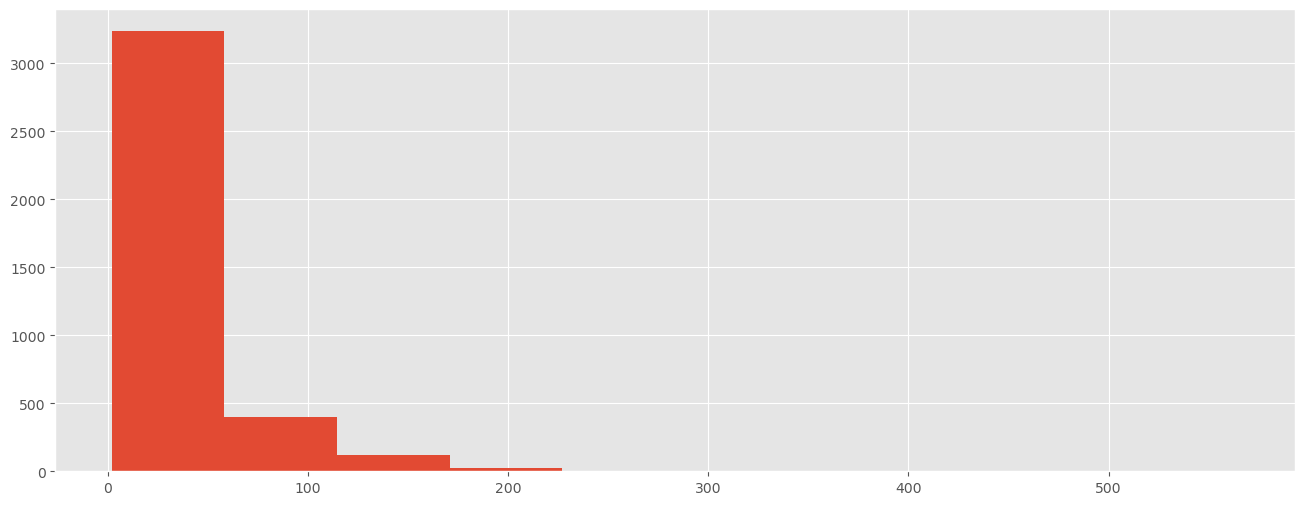

In [58]:
pd.Series(wordcounts).hist()

### Average numbers of quoted words per item

In [59]:
df['Quoted Words'].describe()

count    5884.000000
mean       20.375935
std        94.477822
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max      2138.000000
Name: Quoted Words, dtype: float64

In [60]:
print('Statistics on average, min, and max number of quoted words per item:')
articlesWithMatches['Quoted Words'].describe()

Statistics on average, min, and max number of quoted words per item:


count    1540.000000
mean       77.851948
std       172.172395
min         2.000000
25%         6.000000
50%        17.000000
75%        64.000000
max      2138.000000
Name: Quoted Words, dtype: float64

In [61]:
len(df[df['Quoted Words'] > 0])

1540

<Axes: >

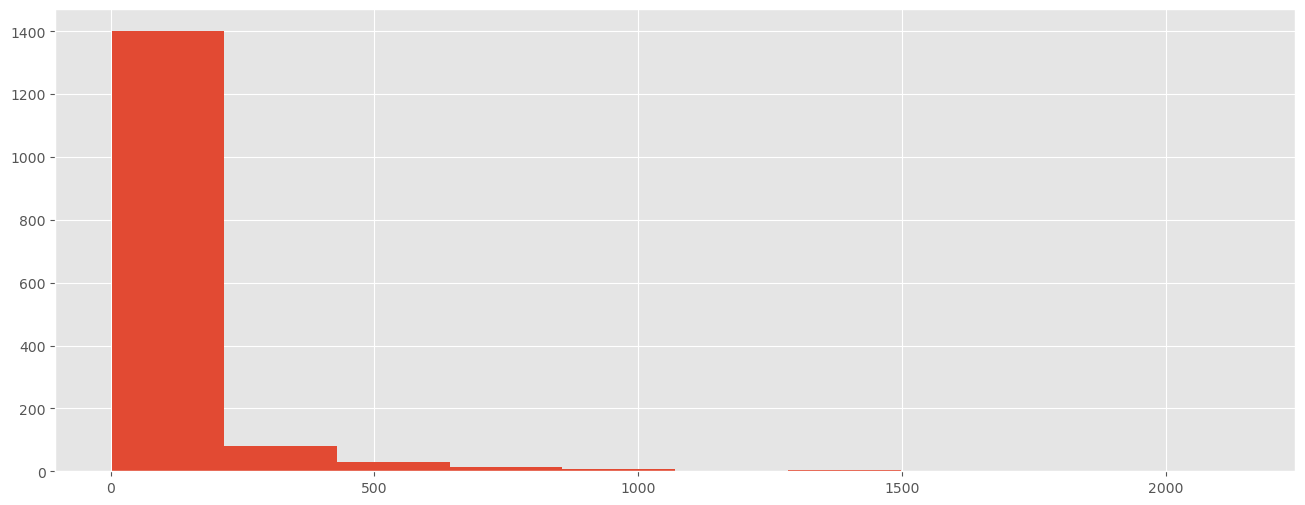

In [62]:
articlesWithMatches['Quoted Words'].hist()

### Average number of words per match, per item 

Average number of words per match, per item: 

In [63]:
print('Average number of words per match, per item:')
articlesWithMatches['Wordcounts'].apply(np.mean).head()

Average number of words per match, per item:


0      4.000000
9     23.000000
17    21.812500
19    22.333333
21    60.000000
Name: Wordcounts, dtype: float64

In [64]:
print('Statistics on average number of words, min/max per match, per item:')
articlesWithMatches['Wordcounts'].apply(np.mean).describe()

Statistics on average number of words, min/max per match, per item:


count    1540.000000
mean       24.711784
std        29.718071
min         2.000000
25%         6.000000
50%        15.000000
75%        32.000000
max       371.250000
Name: Wordcounts, dtype: float64

# Synchronic Analysis

In these next sections, we're going to look at the "Book" and chapter level quotation counts for the entire dataset of text-matcher data.

- [Quotations and words quoted per book in *Middlemarch*](#Quotations-and-words-quoted-per-book-in-Middlemarch)
    - [Number of words quoted per book in *Middlemarch*, bar chart](#Number-of-words-quoted-per-book-in-Middlemarch,-bar-chart)
    - [Number of quotations per book in *Middlemarch*, bar chart](#Number-of-quotations-per-book-in-Middlemarch,-bar-chart)
- [Quotations and words quoted by chapter in *Middlemarch*](#Quotations-and-words-quoted-by-chapter-in-Middlemarch)
	- [Number of words quoted, by chapter in *Middlemarch*](#Number-of-words-quoted,-by-chapter-in-Middlemarch)
	- [Number of quotations, by chapter in *Middlemarch*, bar chart](#Number-of-quotations,-by-chapter-in-Middlemarch,-bar-chart)
	- [Number of quotations, by chapter in *Middlemarch*, bar chart (ranked by frequency)](#Number-of-quotations,-by-chapter-in-Middlemarch,-bar-chart-(ranked-by-frequency))
	- [Normalized number of words quoted per chapter](#Normalized-number-of-words-quoted-per-chapter)
    

## Quotations and words quoted per book in *Middlemarch*

### Number of words quoted per book in *Middlemarch*

In [65]:
wordsQuotedPerBook = synchronicAnalysis(df, bins=bookLocations, useWordcounts=True)
wordsQuotedPerBook

0        0
1    28112
2    32378
3    11351
4    10677
5     6938
6     6045
7     3882
8    20509
dtype: int64

In [66]:
wordsQuotedPerBook = pd.DataFrame(wordsQuotedPerBook, index=range(1,9), columns=['Number of Words Quoted'])
wordsQuotedPerBook['Book'] = range(1, 9)
wordsQuotedPerBook

Number of Words Quoted  Book
1                   28112     1
2                   32378     2
3                   11351     3
4                   10677     4
5                    6938     5
6                    6045     6
7                    3882     7
8                   20509     8

### Number of words quoted per book in *Middlemarch*, bar chart

In [67]:
alt.Chart(wordsQuotedPerBook, title="Number of Words Quoted, per Book in Middlemarch").\
mark_bar().encode(x=alt.X('Book:O', axis=alt.Axis(title="Book", labelAngle=0)), y='Number of Words Quoted:Q').\
properties(width=500)

alt.Chart(...)

### Number of quotations per book in *Middlemarch*

In [68]:
quotationsPerBook = synchronicAnalysis(df, bins=bookLocations, useWordcounts=False)
quotationsPerBook

0       0
1    1036
2     880
3     334
4     311
5     251
6     224
7     142
8     622
dtype: int64

In [69]:
quotationsPerBook = pd.DataFrame(quotationsPerBook, index=range(1,9), columns=['Number of Quotations'])
quotationsPerBook['Book'] = range(1, 9)
quotationsPerBook

Number of Quotations  Book
1                  1036     1
2                   880     2
3                   334     3
4                   311     4
5                   251     5
6                   224     6
7                   142     7
8                   622     8

In [70]:
quotationsPerBook['Number of Quotations'].sum()

3800

### Number of quotations per book in *Middlemarch*, bar chart

In [71]:
alt.Chart(quotationsPerBook, title="Number of Quotations, per Book in Middlemarch").\
mark_bar().encode(x=alt.X('Book:O', axis=alt.Axis(title="Book", labelAngle=0)), y='Number of Quotations:Q').\
properties(width=500)

alt.Chart(...)

## Quotations and words quoted by chapter in *Middlemarch*

In [72]:
synchronicAnalysis(df, useWordcounts=True).to_csv('../papers/spring2017-middlemarch-paper/data/num-words-quoted-per-chapter.csv')

### Number of words quoted, by chapter in *Middlemarch*

In [73]:
wordsQuotedPerChapter = synchronicAnalysis(df, bins=chapterLocations, useWordcounts=True)

In [74]:
wordsQuotedPerChapter = pd.DataFrame(wordsQuotedPerChapter, index=range(0,88), columns=['Number of Words Quoted'])
wordsQuotedPerChapter['Chapter'] = range(0, 88)
wordsQuotedPerChapter

Number of Words Quoted  Chapter
0                     3919        0
1                     6284        1
2                     2412        2
3                     2915        3
4                      513        4
..                     ...      ...
83                    1000       83
84                     180       84
85                    1485       85
86                     184       86
87                    5219       87

[88 rows x 2 columns]

### Number of words quoted, by chapter in *Middlemarch*, bar chart

In [75]:
alt.Chart(wordsQuotedPerChapter, title="Number of Words Quoted, per Chapter in Middlemarch").\
mark_bar().encode(x=alt.X('Chapter:O', axis=alt.Axis(title="Chapter", labelAngle=0, values=list(range(0, 87, 5)))), y='Number of Words Quoted:Q').\
properties(width=800).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
    labelFontSize=14,
    titleFontSize=14)

alt.Chart(...)

### Number of quotations, by chapter in *Middlemarch*

In [76]:
quotationsPerChapter = synchronicAnalysis(df, bins=chapterLocations, useWordcounts=False)

In [77]:
quotationsPerChapter = pd.DataFrame(quotationsPerChapter, index=range(0,88), columns=['Number of Quotations'])
quotationsPerChapter['Chapter'] = range(0, 88)
quotationsPerChapter

Number of Quotations  Chapter
0                    159        0
1                    197        1
2                     89        2
3                    114        3
4                     40        4
..                   ...      ...
83                    40       83
84                    10       84
85                     4       85
86                    29       86
87                   187       87

[88 rows x 2 columns]

### Number of quotations, by chapter in *Middlemarch*, bar chart

In [78]:
quotes_per_chap = alt.Chart(quotationsPerChapter, title="Number of Quotations, per Chapter in Middlemarch").\
mark_bar().encode(x=alt.X('Chapter:O', axis=alt.Axis(title="Chapter", labelAngle=0, values=list(range(0, 87, 5)))), y='Number of Quotations:Q').\
properties(width=800).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
    labelFontSize=14,
    titleFontSize=14)
quotes_per_chap

alt.Chart(...)

In [ ]:
#!pip install vl-convert-python

In [ ]:
alt.Chart(quotationsPerChapter).\
mark_bar().encode(x=alt.X('Chapter:O', axis=alt.Axis(title="Chapter", labelAngle=0, values=list(range(0, 87, 5)))), y='Number of Quotations:Q').\
properties(width=800).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
    labelFontSize=14,
    titleFontSize=14).save('Figure-3.png', ppi=300)

### Number of quotations, by chapter in *Middlemarch*, bar chart (ranked by frequency)

In [79]:
ranked_freq_chap = alt.Chart(quotationsPerChapter, title="Number of Quotations, per Chapter in Middlemarch").\
mark_bar().encode(x=alt.X('Chapter:O', sort='-y', axis=alt.Axis(labelExpr='"Chap." + datum.value', values=())), y=alt.Y('Number of Quotations:Q', axis=alt.Axis(labelAngle=0))).\
properties(width=800).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
    labelFontSize=14,
    titleFontSize=14
)
ranked_freq_chap#.save('Figure-4.png', ppi=300)

alt.Chart(...)

In [80]:
alt.Chart(quotationsPerChapter, title="Number of Quotations, per Chapter in Middlemarch").\
mark_bar().encode(x=alt.X('Number of Quotations:Q'), y=alt.Y('Chapter:O', sort='-x', axis=alt.Axis(title="Chapters, by frequency quoted"))).\
properties().configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
    labelFontSize=14,
    titleFontSize=14
)

alt.Chart(...)

In [81]:
alt.Chart(quotationsPerChapter, title="Number of Quotations, per Chapter in Middlemarch").\
mark_bar().encode(x=alt.X('Chapter:O', sort='-y', axis=alt.Axis(labelExpr='"Chap." + datum.value', values=(20, 15, 1, 87, 10, 2, 0, 3,19, 81))), y=alt.Y('Number of Quotations:Q', axis=alt.Axis(labelAngle=-90))).\
properties(width=800).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
)

alt.Chart(...)

In [82]:
#alt.Chart(quotationsPerChapter).\
#mark_bar().encode(x=alt.X('Chapter:O', sort='-y', axis=alt.Axis(labelExpr='"Chap." + datum.value', values=())), y=alt.Y('Number of Quotations:Q', axis=alt.Axis(labelAngle=0))).\
#properties(width=800).configure_legend(
#titleFontSize=14,
#labelFontSize=14
#).configure_axis(
#    labelFontSize=14,
#    titleFontSize=14
#).save('Figure-4.png', ppi=300)

In [83]:
#alt.Chart(quotationsPerChapter, title="Number of Quotations, per Chapter in Middlemarch").\
#mark_bar().encode(x=alt.X('Chapter:O', sort='-y', axis=alt.Axis(labelExpr='"Chap." + datum.value', values=())), y=alt.Y('Number of Quotations:Q', axis=alt.Axis(labelAngle=-90))).\
#properties(width=900).configure_legend(
#titleFontSize=14,
#labelFontSize=14
#).configure_axis(
#    labelFontSize=12,
#    titleFontSize=14
#)

In [84]:
quotationsPerParagraph = synchronicAnalysis(df, bins=paragraphLocations, useWordcounts=False)

In [85]:
quotationsPerParagraph = pd.DataFrame(quotationsPerParagraph, index=range(0,4889), columns=['Number of Quotations'])
quotationsPerParagraph['Paragraph'] = range(0, 4889)
quotationsPerParagraph

Number of Quotations  Paragraph
0                        0          0
1                        0          1
2                        0          2
3                        0          3
4                        0          4
...                    ...        ...
4884                     2       4884
4885                     2       4885
4886                     2       4886
4887                    31       4887
4888                    60       4888

[4889 rows x 2 columns]

In [86]:
# Let's remove
nonzeroquotationsPerParagraph = quotationsPerParagraph[quotationsPerParagraph['Number of Quotations'] != 0]

In [87]:
nonzeroquotationsPerParagraph.groupby('Number of Quotations').count()

Paragraph
Number of Quotations           
1                           548
2                           199
3                           111
4                            43
5                            39
6                            21
7                            16
8                            13
9                            19
10                            6
11                            7
12                            3
13                           10
14                            6
15                            4
16                            3
18                            1
19                            2
20                            5
21                            1
23                            2
24                            1
25                            3
26                            1
28                            1
31                            2
32                            1
33                            1
34                            2
41                            2
42                            2
45                            1
47                            1
54                            1
60                            1
63                            1
69                            1
71                            1

### Number of quotations, by paragraph in *Middlemarch*, bar chart (sorted by frequency)

In [88]:
#ax = nonzeroquotationsPerParagraph['Number of Quotations'].sort_values(ascending=False).plot(kind='bar',\                                                                                     title="Number of Middlemarch Quotations, by Paragraph, Sorted by Frequency", figsize=(40,10))
#ax.set_xlabel('Paragraph')
#ax.set_ylabel('Number of Quotations')

### Normalized number of words quoted per chapter

In [89]:
# Get the raw number of quotations per chapter
# synchronicAnalysis(df, useWordcounts=False).to_csv('../papers/spring2017-middlemarch-paper/data/num-quotations-per-chapter.csv')

Text(0, 0.5, 'Words Quoted, Normalized')

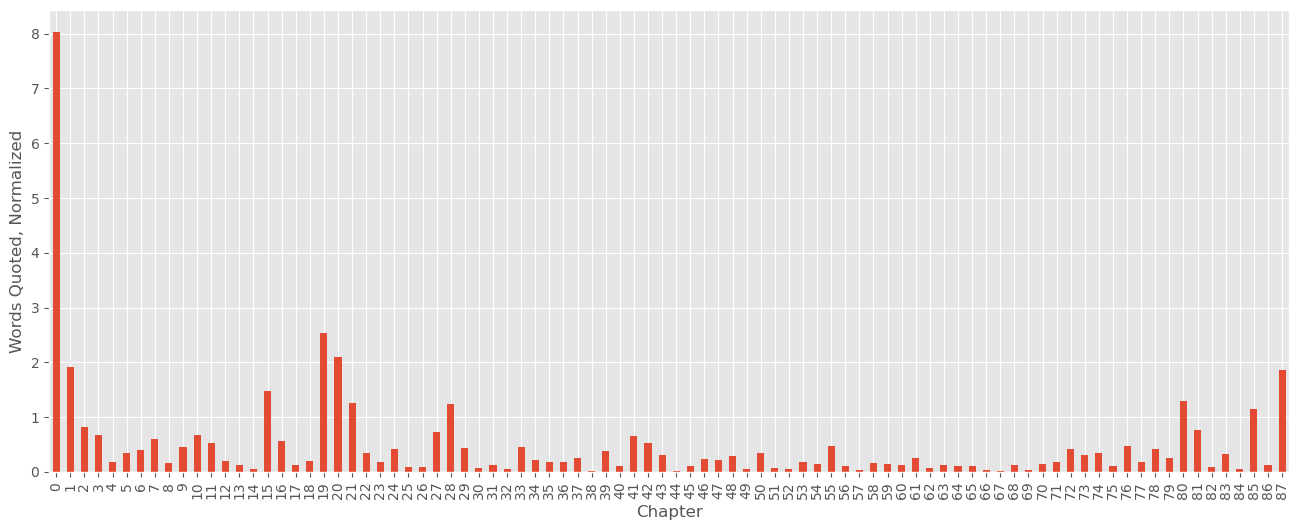

In [90]:
# Adjusted for the number of words in each chapter
ax = (synchronicAnalysis(df) / chapterLengthsSeries).plot(kind='bar')
ax.set_xlabel('Chapter')
ax.set_ylabel('Words Quoted, Normalized')

# Diachronic Analysis

For the diachronic analysis, we examine book- and chapter-level data for quotations from *Middlemarch*. 

- [*Middlemarch* diachronic analysis: quotations per book, by decade](#Middlemarch-diachronic-analysis:-quotations-per-book,-by-decade)
    - [Number of quotations per book, per decade (not normalized or weighted)](#Number-of-quotations-per-book,-per-decade-(not-normalized-or-weighted))
    - [*Middlemarch* quotations per book, per decade (not normalized or weighted), heatmap](#Middlemarch-quotations-per-book,-per-decade-(not-normalized-or-weighted),-heat-map)
    - [Number of quotations per book, per decade (normalized by decade)](#Number-of-quotations-per-book,-per-decade-(normalized-by-decade))
    - [Number of quotations per book, per decade (normalized by decade and weighted by word count)](#Number-of-quotations-per-book,-per-decade-(normalized-by-decade-and-weighted-by-word-count))
    - [*Middlemarch* quotations per book, per decade (normalized and weighted), heatmap](#Middlemarch-quotations-per-book,-per-decade-(normalized-and-weighted),-heat-map)
- [ *Middlemarch* diachronic analysis: quotations per chapter, by decade](#Middlemarch-diachronic-analysis:-quotations-per-chapter,-by-decade)
    - [Number of quotations per chapter, per decade (not normalized or weighted)](#Number-of-quotations-per-chapter,-per-decade-(not-normalized-or-weighted))
    - [*Middlemarch* quotations per chapter, per decade (not normalized or weighted), heat map](#Middlemarch-quotations-per-chapter,-per-decade-(not-normalized-or-weighted),-heat-map)
    - [Number of quotations per chapter, per decade (normalized by decade and weighted by word count)](#Number-of-quotations-per-chapter,-per-decade-(normalized-by-decade-and-weighted-by-word-count))
    - [*Middlemarch* quotations per chapter, per decade (normalized and weighted), heat map](#Middlemarch-quotations-per-chapter,-per-decade-(normalized-and-weighted),-heat-map)
    - [*Middlemarch* top 5 most frequently quoted chapters, line chart](#Middlemarch-top-5-most-frequently-quoted-chapters,-line-chart)
    - [*Middlemarch* top 5 most frequently quoted chapters, line chart (color)](#Middlemarch-top-5-most-frequently-quoted-chapters,-line-chart-(color))  
    - [*Middlemarch* top 5 most frequently quoted chapters (normalized and weighted), line chart](#Middlemarch-top-5-most-frequently-quoted-chapters-(normalized-and-weighted),-line-chart)
    - [*Middlemarch* top 5 most frequently quoted chapters (normalized and weighted), line chart (color)](#Middlemarch-top-5-most-frequently-quoted-chapters-(normalized-and-weighted),-line-chart-(color))

## *Middlemarch* diachronic analysis: quotations per book, by decade

We use three different methods to analyze quotations per book, by decade. First, we examine the raw counts of quotations per book, per decade. Because our corpus contains [varying numbers of JSTOR texts per decade](#How-many-articles-do-we-have-published-in-each-year?), we've decided to also weigh by length of quotation and normalize per decade.

### Number of quotations per book, per decade (not normalized or weighted)

In [91]:
# Raw quotation counts (not weighted by the number of words in the quoatation or normalized by decade)
# Turning on useWordcounts makes it so that it's weighted by wordcount. Turning it off uses raw numbers of quotations.
booksNotNormalizedNotWeightedDiaDF = diachronicAnalysis(df, decades=(1960, 2020), bins=bookLocations,\
                                                        useWordcounts=False, normalize=False).sort_index()
print('Number of quotations per book, per decade')
booksNotNormalizedNotWeightedDiaDF

Number of quotations per book, per decade


0    1    2   3   4   5   6   7    8
1960  0   55   49  17  23  23   9  12   54
1970  0  151   97  40  36  33  28  14   69
1980  0  183  145  50  47  29  44  22  117
1990  0  234  214  69  85  65  39  30  134
2000  0  196  170  60  58  47  50  23   80
2010  0  177  163  86  54  40  46  33  111

In [92]:
booksNotNormalizedNotWeightedDiaDF['decade'] = booksNotNormalizedNotWeightedDiaDF.index

In [93]:
booksNotNormalizedNotWeightedDiaDFMelted = booksNotNormalizedNotWeightedDiaDF.melt(id_vars='decade', var_name='book')

In [94]:
# cut out erroneous "book 0" material (ie title page)
booksNotNormalizedNotWeightedDiaDFMelted = booksNotNormalizedNotWeightedDiaDFMelted[booksNotNormalizedNotWeightedDiaDFMelted.book != 0]

In [95]:
booksNotNormalizedNotWeightedDiaDFMeltedExport = booksNotNormalizedNotWeightedDiaDFMelted.rename(columns={"value": "Number of Quotations"})
# To export a CSV, uncomment the line below
# booksNotNormalizedNotWeightedDiaDFMeltedExport.to_csv("Middlemarch-quotations-per-book-per-decade-not-weighted-or-normalized.csv")

### *Middlemarch* quotations per book, per decade (not normalized or weighted), heat map

In [96]:
alt.Chart(booksNotNormalizedNotWeightedDiaDFMelted,\
          title="Middlemarch quotations per book, per decade (not weighted or normalized)")\
.mark_rect().encode(x=alt.X('book', type='ordinal', 
                            axis=alt.Axis(labelAngle=0)), 
                    y=alt.Y('decade', type='ordinal', sort='descending',
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                    color=alt.Color('value', legend=alt.Legend(title="Number of Quotations"))).properties(width=500, height=300).configure_axis(
    labelFontSize=14,
    titleFontSize=14
).configure_legend(
titleFontSize=14,
labelFontSize=14
)

alt.Chart(...)

In [97]:
alt.Chart(booksNotNormalizedNotWeightedDiaDFMelted,\
          title="Middlemarch quotations per book, per decade (not weighted or normalized)")\
.mark_rect().encode(x=alt.X('decade', type='ordinal',
                            axis=alt.Axis(labelAngle=0, labelExpr='datum.value + "s"')), 
                    y=alt.Y('book', type='ordinal', sort='descending'), 
                    color=alt.Color('value', legend=alt.Legend(title="Number of Quotations (normalized)"))).properties(width=500, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
    labelFontSize=14,
    titleFontSize=14
) 

alt.Chart(...)

### Number of quotations per book, per decade (normalized by decade)

In [98]:
# Number of quotations (not weighted), normalized by decade(counts are scaled to the maximum value per decade)
booksNotWeightedDiaDF = diachronicAnalysis(df, decades=(1960, 2020), bins=bookLocations, useWordcounts=False, normalize=True).sort_index()
print('Quotations per book, per decade (normalized by decade):')
booksNotWeightedDiaDF

Quotations per book, per decade (normalized by decade):


0    1         2         3         4         5         6         7  \
1960  0.0  1.0  0.890909  0.309091  0.418182  0.418182  0.163636  0.218182   
1970  0.0  1.0  0.642384  0.264901  0.238411  0.218543  0.185430  0.092715   
1980  0.0  1.0  0.792350  0.273224  0.256831  0.158470  0.240437  0.120219   
1990  0.0  1.0  0.914530  0.294872  0.363248  0.277778  0.166667  0.128205   
2000  0.0  1.0  0.867347  0.306122  0.295918  0.239796  0.255102  0.117347   
2010  0.0  1.0  0.920904  0.485876  0.305085  0.225989  0.259887  0.186441   

             8  
1960  0.981818  
1970  0.456954  
1980  0.639344  
1990  0.572650  
2000  0.408163  
2010  0.627119

### Number of quotations per book, per decade (normalized by decade and weighted by word count)

In [99]:
# Weighted by wordcount (by the number of words in the quotation) and normalized by decade(counts are scaled to the maximum value per decade)
booksDiaDF = diachronicAnalysis(df, decades=(1960, 2020), bins=bookLocations, useWordcounts=True, normalize=True).sort_index()
print('Quotations per book, per decade (weighted by length of quotation and normalized by decade):')
booksDiaDF

Quotations per book, per decade (weighted by length of quotation and normalized by decade):


0         1         2         3         4         5         6  \
1960  0.0  0.567051  1.000000  0.229606  0.354556  0.481098  0.068046   
1970  0.0  1.000000  0.839023  0.271083  0.264752  0.206195  0.148994   
1980  0.0  0.877438  0.946007  0.268733  0.287826  0.156231  0.250462   
1990  0.0  0.816222  1.000000  0.208229  0.418430  0.176811  0.106744   
2000  0.0  1.000000  0.964953  0.528371  0.265020  0.223465  0.289386   
2010  0.0  0.748342  1.000000  0.519065  0.374503  0.152023  0.190650   

             7         8  
1960  0.166335  0.467967  
1970  0.121411  0.555505  
1980  0.099569  1.000000  
1990  0.078743  0.528329  
2000  0.079940  0.463117  
2010  0.188992  0.539954

In [100]:
booksDiaDF['decade'] = booksDiaDF.index

In [101]:
booksMelted = booksDiaDF.melt(id_vars='decade', var_name='book')

In [102]:
# cut out erroneous "book 0" material (ie title page)
booksMelted = booksMelted[booksMelted.book != 0]

### *Middlemarch* quotations per book, per decade (normalized and weighted), heat map

In [103]:
alt.Chart(booksMelted,\
          title="Middlemarch quotations per book, per decade (weighted by length of quotation and normalized by decade)")\
.mark_rect().encode(x=alt.X('book', type='ordinal', 
                            axis=alt.Axis(labelAngle=0)), 
                    y=alt.Y('decade', type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                    color=alt.Color('value', legend=alt.Legend(title="Amount Quoted"))).properties(width=500, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
    labelFontSize=14,
    titleFontSize=14
) 

alt.Chart(...)

## *Middlemarch* diachronic analysis: quotations per chapter, by decade

### Number of quotations per chapter, per decade (not normalized or weighted)

In [104]:
# Raw quotation counts (not weighted by the number of words in the quoatation or normalized by decade)
# Turning on useWordcounts makes it so that it's weighted by wordcount. Turning it off uses raw numbers of quotations.
diaDFquoteOnly = diachronicAnalysis(df, decades=(1960, 2020), bins=chapterLocations, useWordcounts=False, normalize=False).sort_index()
diaDFquoteOnly.columns.name ='chapter'
diaDFquoteOnly.index.name = 'decade'

In [105]:
with pd.option_context("display.min_rows", 6, "display.max_rows", 100, \
                       "display.max_columns", 90, 'display.max_colwidth', 150):
    display(diaDFquoteOnly)

chapter  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  \
decade                                                                        
1960      8   7   5   4   2   3   0   6   1   6   8   3   2   0   0   8   3   
1970     20  26  20  24   8   4  11   8   5   8   7   8   2   2   1  21  14   
1980     34  41  13  21   4  10   4   8   0  13  17   9   9   9   4  38  17   
1990     38  38  20  23   5  14  13  10   1  14  24  21  14   9   4  66  11   
2000     28  30  19  23  12   8   7   8   2  26  22   7   4   4   1  27  26   
2010     21  53  12  13   9   5  10   4   2  17  17   7   7   2   1  32  15   

chapter  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
decade                                                                        
1960      3   0   1  20  11   3   2   1   1   1   7   3   0   1   1   0   0   
1970      1   3   9  27   8  11   0   3   1   3  14  12   3   1   3   0   0   
1980      2   6  18  37   9   5  11   2   0   2   8   7  12   3   4   1   0   
1990     10  11  34  41  15  12   1   6   4   6  27   5   8   1   6   1   4   
2000      2   4  26  45  12  23   9   7   3   2   7   4   5   5   4   4  10   
2010      4  10  24  39  21  15   7  20   2   0  20  22   5   1   7   2   0   

chapter  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  \
decade                                                                        
1960      0   5   2   4   0   2   3   6   1   2   0   0   7   3   1   0   4   
1970      1   0   2  11   1   4   2   3  12   9   1   4   6   1   5   0   4   
1980      6   1   4  20   0   9   0   0   7   7   0   2   1  10   1   0   3   
1990      5   7  18  16   1   7   0  10  21   2   1  19   8   5  11   0  14   
2000      0   3   4  18   2   8   6   2  15   6   1   9   1   1   9   3  10   
2010      2   2  10  10   1  12   5   4   8   6   0   4   2   0   8   0   5   

chapter  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  \
decade                                                                        
1960      1   2   3   1   0   3   0   1   0   3   1   0   1   2   0   2   0   
1970      1   1   1   4   2   5   2   8   1   3   2   1   1   3   1   0   0   
1980      5   0   0  10   4   4   0  11   2   2   6   5   1   9   4   2   1   
1990      1   2   2   2   4   3   1  10   3   4   7   5   6   3   5   1   2   
2000      1   1   5  10   4   7   5   4   1   8   8   3   5   0   0   2   0   
2010      8   0   7   1   6   7   0  15   0   7   8   2   7   5   0   1   2   

chapter  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  \
decade                                                                        
1960      1   0   0   6   0   1   0   4   6   2   6   1   4  12   1   2   0   
1970      2   3   1   3   3   2   7   1   4   1   1   1  10   9   0   4   1   
1980      0   2   0   3   9   2   3   2  15   6   4   0  17  13   1   7   0   
1990      3   0   6   4   6   1   4   3  10   2  13   2  17  20   2  15   3   
2000      3   7   3   3   5   1   0   4   9   2   4   2   6   5   0   5   2   
2010      2   1   4  11   4   3   7   3   3   4   0   0  15  11   1   7   0   

chapter  85  86  87  
decade               
1960      0   6   9  
1970      0   3  22  
1980      4   3  31  
1990      0   3  33  
2000      0   6  29  
2010      0   2  51

In [106]:
diaDFquoteOnly['decade'] = diaDFquoteOnly.index

In [107]:
diaDFquoteOnlyMelted = diaDFquoteOnly.melt(id_vars='decade')

### *Middlemarch* quotations per chapter, per decade (not normalized or weighted), heat map

In [108]:
#Chart with raw quotations
alt.Chart(diaDFquoteOnlyMelted, title="Middlemarch quotations per chapter, per decade (not weighted or normalized)")\
.mark_rect().encode(x=alt.X('chapter', title="Chapter", type='ordinal', 
                            axis=alt.Axis(labelAngle=0, values=list(range(0, 87, 5)))), 
                    y=alt.Y('decade', title="Decade", type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                    color=alt.Color('value', legend=alt.Legend(title="Number of Quotations")))\
.properties(width=1000, height=300).configure_axis(
    labelFontSize=14,
    titleFontSize=14
).configure_legend(
titleFontSize=14,
labelFontSize=14
) 

alt.Chart(...)

In [109]:
#Chart with raw quotations, transposed
alt.Chart(diaDFquoteOnlyMelted, title="Middlemarch quotations per chapter, per decade (not weighted or normalized)")\
.mark_rect().encode(x=alt.X('decade',title="Decade", type='ordinal', sort='ascending', axis=alt.Axis(labelAngle=0, 
                                                            labelExpr='datum.value + "s"')), 
                    y=alt.Y('chapter', title="Chapter", type='ordinal', sort='descending', axis=alt.Axis(labelAngle=0, values=list(range(0, 87, 5)))), 
                    color=alt.Color('value', legend=alt.Legend(title="Number of Quotations")))\
.properties(width=300, height=1000).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
) 

alt.Chart(...)

### Number of quotations per chapter, per decade (normalized by decade and weighted by word count)

In [110]:
# Weighted by wordcount (by the number of words in the quoatation) and normalized by decade(counts are scaled to the maximum value per decade)
diaDF = diachronicAnalysis(df, decades=(1960, 2020), bins=chapterLocations, useWordcounts=True, normalize=True).sort_index()
diaDF.columns.name = 'chapter'
diaDF.index.name = 'decade'

In [111]:
with pd.option_context("display.min_rows", 6, "display.max_rows", 100, \
                       "display.max_columns", 90, 'display.max_colwidth', 150):
    display(diaDF)

chapter        0         1         2         3         4         5         6   \
decade                                                                          
1960     0.119514  0.119514  0.266106  0.068161  0.012138  0.022409  0.000000   
1970     0.224055  0.575258  0.584192  0.393814  0.107904  0.061856  0.360825   
1980     0.437037  0.772391  0.164310  0.377778  0.032997  0.249832  0.106397   
1990     0.514066  0.436061  0.150043  0.271952  0.046462  0.135550  0.196505   
2000     0.452062  0.739689  0.176754  0.371184  0.052491  0.179968  0.151044   
2010     0.212549  0.984737  0.198417  0.158282  0.049180  0.044658  0.136235   

chapter        7         8         9         10        11        12        13  \
decade                                                                          
1960     0.104575  0.008403  0.267974  0.230626  0.036415  0.074697  0.000000   
1970     0.115464  0.158076  0.087973  0.079725  0.226804  0.063918  0.004124   
1980     0.175758  0.000000  0.105051  0.212121  0.160269  0.084175  0.092256   
1990     0.068201  0.013640  0.075021  0.249361  0.264706  0.227195  0.072890   
2000     0.069095  0.009641  0.302625  0.400107  0.269416  0.035351  0.028923   
2010     0.038440  0.016959  0.239118  0.295647  0.077445  0.100057  0.022046   

chapter        14        15        16        17        18        19        20  \
decade                                                                          
1960     0.000000  0.621849  0.272642  0.020542  0.000000  0.005602  1.000000   
1970     0.002749  0.627491  0.340893  0.004811  0.012371  0.219244  1.000000   
1980     0.061953  0.801347  0.377104  0.035690  0.099663  0.400673  0.918519   
1990     0.033674  1.000000  0.237425  0.109122  0.113811  0.511509  0.777494   
2000     0.006427  0.470809  0.305838  0.020889  0.101768  0.539904  1.000000   
2010     0.010741  0.613906  0.273036  0.039570  0.159412  0.349915  0.733748   

chapter        21        22        23        24        25        26        27  \
decade                                                                          
1960     0.372549  0.053221  0.019608  0.013072  0.005602  0.004669  0.183940   
1970     0.134021  0.204811  0.000000  0.061168  0.002062  0.009622  0.381443   
1980     0.242424  0.073401  0.235690  0.010774  0.000000  0.006061  0.151515   
1990     0.290708  0.093777  0.008525  0.073316  0.028986  0.060102  0.259165   
2000     0.146224  0.476165  0.212641  0.217461  0.061061  0.006963  0.111944   
2010     1.000000  0.207462  0.033352  0.662521  0.023742  0.000000  0.348785   

chapter        28        29        30        31        32        33        34  \
decade                                                                          
1960     0.298786  0.000000  0.006536  0.006536  0.000000  0.000000  0.000000   
1970     0.229553  0.094845  0.003436  0.041924  0.000000  0.000000  0.032990   
1980     0.084848  0.296970  0.047138  0.022222  0.026263  0.000000  0.064646   
1990     0.084825  0.064791  0.001705  0.034527  0.002131  0.057118  0.193095   
2000     0.252276  0.194965  0.062132  0.055169  0.089984  0.431173  0.000000   
2010     0.446580  0.118146  0.002826  0.105144  0.028830  0.000000  0.033917   

chapter        35        36        37        38        39        40        41  \
decade                                                                          
1960     0.106443  0.048553  0.156863  0.000000  0.030812  0.045752  0.320261   
1970     0.000000  0.062543  0.188316  0.007560  0.058419  0.018557  0.107216   
1980     0.041751  0.042424  0.253872  0.000000  0.415488  0.000000  0.000000   
1990     0.201194  0.185848  0.176897  0.003410  0.078005  0.000000  0.162830   
2000     0.027317  0.023032  0.258168  0.018211  0.103910  0.088913  0.044992   
2010     0.044658  0.186546  0.163934  0.009045  0.356699  0.183154  0.196721   

chapter        42        43        44        45        46        47        48  \
decade                   

In [112]:
diaDF['decade'] = diaDF.index

In [113]:
diaMelted = diaDF.melt(id_vars='decade')

### *Middlemarch* quotations per chapter, per decade (normalized and weighted), heat map

Because our corpus contains [varying numbers of JSTOR texts per decade](#How-many-articles-do-we-have-published-in-each-year?), we've decided to also weigh by length of quotation and normalize per decade.

In [114]:
diachronic_chap = alt.Chart(diaMelted, title="Middlemarch quotations per chapter, per decade (normalized by decade and weighted by word count)")\
.mark_rect().encode(x=alt.X('chapter', title="Chapter", type='ordinal', axis=alt.Axis(labelAngle=0, values=list(range(0, 87, 5)))), 
                    y=alt.Y('decade', title="Decade",type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                                        color=alt.Color('value', legend=alt.Legend(title="Amount Quoted")))\
.properties(width=1000, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
)
diachronic_chap

alt.Chart(...)

In [ ]:
alt.Chart(diaMelted, )\
.mark_rect().encode(x=alt.X('chapter', title="Chapter", type='ordinal', axis=alt.Axis(labelAngle=0, values=list(range(0, 87, 5)))), 
                    y=alt.Y('decade', title="Decade",type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                                        color=alt.Color('value', legend=alt.Legend(title="Amount Quoted")))\
.properties(width=1000, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
).save('Figure-5.png', ppi=300)

In [115]:
top5 = diaDFquoteOnlyMelted["chapter"].where(diaDFquoteOnlyMelted["chapter"].isin([0, 1, 15, 20, 87]), other="Other")

In [116]:
diaDFquoteOnlyMelted['top5'] = top5

In [117]:
color = alt.condition(alt.datum.top5 == 'top5',
                      alt.Color('chapter:O', legend=None),
                      alt.value('gainsboro')
                     )

line = alt.Chart(diaDFquoteOnlyMelted.loc[diaDFquoteOnlyMelted['chapter'].isin([0, 1, 15, 20, 87])], title="Middlemarch top 5 most quoted chapters, by decade (not weighted or normalized)")\
.mark_line().encode(
    x=alt.X('decade', title="Decade",type='ordinal', sort='ascending', 
                                                            axis=alt.Axis(labelAngle=0, labelExpr='datum.value + "s"')), 
    y=alt.Y('value:Q', title="Number of Quotations", axis=alt.Axis(labelAngle=0)),
    color=alt.Color('chapter:O', scale=alt.Scale(scheme='greys'), legend=None,),
        
)

points = line.mark_point(filled=True).encode(
    color=alt.Color('chapter:O', scale=alt.Scale(scheme='greys')),
    shape=alt.Shape('chapter:O', legend=alt.Legend(title="Chapter"), scale=alt.Scale(range=['square', 'circle',  'cross','triangle-right', 'diamond'])),
    size=alt.Size('chapter', legend=None, scale=alt.Scale(range=[200,200],domain=['0', '1', '15', '20', '87']))
)

greyed = alt.Chart(diaDFquoteOnlyMelted.loc[~diaDFquoteOnlyMelted['chapter'].isin([0, 1, 15, 20, 87])])\
.mark_line().encode(
    x=alt.X('decade', title="Decade",type='ordinal', sort='ascending', 
                                                            axis=alt.Axis(labelAngle=0, labelExpr='datum.value + "s"')), 
    y=alt.Y('value:Q', title="Number of Quotations", axis=alt.Axis(labelAngle=0)),
    color=color, 
)

top5_chart = alt.layer(
    greyed,
    line,
    points,
).resolve_scale(
    color='independent',
    shape='independent'
).properties(width=400).configure_legend(
titleFontSize=11,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
)
#top5_chart.save('Figure-6.png', ppi=300)

### *Middlemarch* top 5 most frequently quoted chapters, line chart

In [118]:
top5_chart#.save('Figure-6.png', ppi=300)

alt.LayerChart(...)

In [119]:
color = alt.condition(alt.datum.top5 == 'top5',
                      alt.Color('chapter:O', legend=None),
                      alt.value('gainsboro')
                     )

line = alt.Chart(diaDFquoteOnlyMelted.loc[diaDFquoteOnlyMelted['chapter'].isin([0, 1, 15, 20, 87])], title="Middlemarch top 5 most quoted chapters, by decade (not weighted or normalized)")\
.mark_line().encode(
    x=alt.X('decade', title="Decade",type='ordinal', sort='ascending', 
                                                            axis=alt.Axis(labelAngle=0, labelExpr='datum.value + "s"')), 
    y=alt.Y('value:Q', title="Number of Quotations", axis=alt.Axis(labelAngle=0)),
    color=alt.Color('chapter:O', scale=alt.Scale(scheme='category20'), legend=None,),
        
)

points = line.mark_point(filled=True).encode(
    color=alt.Color('chapter:O', scale=alt.Scale(scheme='category20')),
    shape=alt.Shape('chapter:O', legend=alt.Legend(title="Chapter"), scale=alt.Scale(range=['square', 'circle',  'cross','triangle-right', 'diamond'])),
    size=alt.Size('chapter', legend=None, scale=alt.Scale(range=[200,200],domain=['0', '1', '15', '20', '87']))
)

greyed = alt.Chart(diaDFquoteOnlyMelted.loc[~diaDFquoteOnlyMelted['chapter'].isin([0, 1, 15, 20, 87])])\
.mark_line().encode(
    x=alt.X('decade', title="Decade",type='ordinal', sort='ascending', 
                                                            axis=alt.Axis(labelAngle=0, labelExpr='datum.value + "s"')), 
    y=alt.Y('value:Q', title="Number of Quotations", axis=alt.Axis(labelAngle=0)),
    color=color, 
)

top5_chart_color = alt.layer(
    greyed,
    line,
    points,
).resolve_scale(
    color='independent',
    shape='independent'
).properties(width=400).configure_legend(
titleFontSize=11,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
)


### *Middlemarch* top 5 most frequently quoted chapters, line chart (color)

In [120]:
top5_chart_color

alt.LayerChart(...)

In [121]:
color = alt.condition(alt.datum.top5 == 'top5',
                      alt.Color('chapter:O', legend=None),
                      alt.value('gainsboro')
                     )

line = alt.Chart(diaMelted.loc[diaMelted['chapter'].isin([0, 1, 15, 20, 87])], title="Middlemarch top 5 most quoted chapters, by decade (normalized and weighted)")\
.mark_line().encode(
    x=alt.X('decade', title="Decade",type='ordinal', sort='ascending', 
                                                            axis=alt.Axis(labelAngle=0, labelExpr='datum.value + "s"')), 
    y=alt.Y('value:Q', title="Amount Quoted", axis=alt.Axis(labelAngle=0)),
    color=alt.Color('chapter:O', scale=alt.Scale(scheme='greys'), legend=None,),
        
)

points = line.mark_point(filled=True).encode(
    color=alt.Color('chapter:O', scale=alt.Scale(scheme='greys')),
    shape=alt.Shape('chapter:O', legend=alt.Legend(title="Chapter"), scale=alt.Scale(range=['square', 'circle',  'cross','triangle-right', 'diamond'])),
    size=alt.Size('chapter', legend=None, scale=alt.Scale(range=[200,200],domain=['0', '1', '15', '20', '87']))
)

greyed = alt.Chart(diaMelted.loc[~diaMelted['chapter'].isin([0, 1, 15, 20, 87])])\
.mark_line().encode(
    x=alt.X('decade', title="Decade",type='ordinal', sort='ascending', 
                                                            axis=alt.Axis(labelAngle=0, labelExpr='datum.value + "s"')), 
    y=alt.Y('value:Q', title="Amount Quoted", axis=alt.Axis(labelAngle=0)),
    color=color, 
)

top5_chart_normalized = alt.layer(
    greyed,
    line,
    points,
).resolve_scale(
    color='independent',
    shape='independent'
).properties(width=400).configure_legend(
titleFontSize=11,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
)


### *Middlemarch* top 5 most frequently quoted chapters (normalized and weighted), line chart

In [122]:
top5_chart_normalized

alt.LayerChart(...)

In [123]:
color = alt.condition(alt.datum.top5 == 'top5',
                      alt.Color('chapter:O', legend=None),
                      alt.value('gainsboro')
                     )

line = alt.Chart(diaMelted.loc[diaMelted['chapter'].isin([0, 1, 15, 20, 87])], title="Middlemarch top 5 most quoted chapters, by decade (normalized and weighted)")\
.mark_line().encode(
    x=alt.X('decade', title="Decade",type='ordinal', sort='ascending', 
                                                            axis=alt.Axis(labelAngle=0, labelExpr='datum.value + "s"')), 
    y=alt.Y('value:Q', title="Amount Quoted", axis=alt.Axis(labelAngle=0)),
    color=alt.Color('chapter:O', scale=alt.Scale(scheme='category20'), legend=None,),
        
)

points = line.mark_point(filled=True).encode(
    color=alt.Color('chapter:O', scale=alt.Scale(scheme='category20')),
    shape=alt.Shape('chapter:O', legend=alt.Legend(title="Chapter"), scale=alt.Scale(range=['square', 'circle',  'cross','triangle-right', 'diamond'])),
    size=alt.Size('chapter', legend=None, scale=alt.Scale(range=[200,200],domain=['0', '1', '15', '20', '87']))
)

greyed = alt.Chart(diaMelted.loc[~diaMelted['chapter'].isin([0, 1, 15, 20, 87])])\
.mark_line().encode(
    x=alt.X('decade', title="Decade",type='ordinal', sort='ascending', 
                                                            axis=alt.Axis(labelAngle=0, labelExpr='datum.value + "s"')), 
    y=alt.Y('value:Q', title="Amount Quoted", axis=alt.Axis(labelAngle=0)),
    color=color, 
)

top5_chart_normalized_color = alt.layer(
    greyed,
    line,
    points,
).resolve_scale(
    color='independent',
    shape='independent'
).properties(width=400).configure_legend(
titleFontSize=11,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
)

### *Middlemarch* top 5 most frequently quoted chapters (normalized and weighted), line chart (color)

In [124]:
top5_chart_normalized_color

alt.LayerChart(...)

In [125]:
# Get the normalized proportion of, say, Chapter 20 in 1950: 
diachronicAnalysis(df)[20][1950]

0.6318681318681318

# *Middlemarch* chapter-specific analysis

- [Chapter 15](#Chapter-15)
    - [Paragraph-level-analysis of Chapter 15](#Paragraph-level-analysis-of-Chapter-15)
- [Chapter 20](#Chapter-20)
    - [Paragraph-level-analysis of Chapter 20](#Paragraph-level-analysis-of-Chapter-20)
    - [Which paragraphs in Chapter 20 are quoted most often?](#Which-paragraphs-in-Chapter-20-are-quoted-most-often?)

## Chapter 15

In [126]:
# Try to find out why Ch. 15 was so big in the 80s and 90s. 
chap15s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: # Looking at the 1980s, 1990s
        for start in starts: 
            if start > 290371 and start < 322052: # Does it cite Chapter XV? 
                if row.id not in ids: 
                    chap15s.append(row)
                    ids.append(row.id)

In [127]:
# Get the titles of those articles.
print('Titles of articles that quote Chapter 15:')
[item.title for item in chap15s]

Titles of articles that quote Chapter 15:


['Woman of Maxims:',
 'Brava! And Farewell to Greatheart',
 'The Union of "Miss Brooke" and "Middlemarch": A Study of the Manuscript',
 '"Middlemarch" and George Eliot\'s Female (Re) Vision of Shakespeare',
 'Heroism and Organicism in the Case of Lydgate',
 'Professional Judgment and the Rationing of Medical Care',
 'SILENCE, GESTURE, AND MEANING IN "MIDDLEMARCH"',
 'Reflections on "The Philosophical Bases of Feminist Literary Criticisms"',
 'Strategies for Writing: Theories and Practices',
 'Review Article',
 'AN END TO CONVERTING PATIENTS\' STOMACHS INTO DRUG-SHOPS: LYDGATE\'S NEW METHOD OF CHARGING HIS PATIENTS IN "MIDDLEMARCH"',
 'Review Article',
 'Illuminating the Vision of Ordinary Life: A Tribute to "Middlemarch"',
 'Review Article',
 "PLEXUSES AND GANGLIA: ELIOTS AND LEWES'S THEORY OF NERVE-CONSCIOUSNESS",
 'Review Article',
 'Middlemarch, Realism and the Birth of the Clinic',
 'ERZÄHLERISCHE OBJEKTIVITÄT, ,AUTHORIAL INTRUSIONS‘ UND ENGLISCHER REALISMUS',
 'Review Article',
 '

In [128]:
len(chap15s)

47

In [129]:
xvStart, xvEnd = chapterLocations[15:17]

In [130]:
print(mm[xvStart:xvStart+1000]) 

CHAPTER XV.

    "Black eyes you have left, you say,
     Blue eyes fail to draw you;
     Yet you seem more rapt to-day,
     Than of old we saw you.

    "Oh, I track the fairest fair
     Through new haunts of pleasure;
     Footprints here and echoes there
     Guide me to my treasure:

    "Lo! she turns--immortal youth
     Wrought to mortal stature,
     Fresh as starlight's aged truth--
     Many-named Nature!"


A great historian, as he insisted on calling himself, who had the
happiness to be dead a hundred and twenty years ago, and so to take his
place among the colossi whose huge legs our living pettiness is
observed to walk under, glories in his copious remarks and digressions
as the least imitable part of his work, and especially in those initial
chapters to the successive books of his history, where he seems to
bring his armchair to the proscenium and chat with us in all the lusty
ease of his fine English.  But Fielding lived when the days were longer
(for time, like mone

### Paragraph-level analysis of Chapter 15

In [131]:
# Try to find out which articles cite the first 2/3 of Chapter XV (with Lydgate's scientific research) 
# vs the last 1/3 on the story of Laure
chap15p1s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: 
        for start in starts: 
            if start > 290371 and start < 313892: # Does it cite the first 2/3 of Chapter XV? 
                if row.id not in ids: 
                    chap15p1s.append(row)
                    ids.append(row.id)
chap15p2s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: 
        for start in starts: 
            if start > 313892 and start < 322052: # Does it cite the last 1/3 of Chapter XV? 
                if row.id not in ids: 
                    chap15p2s.append(row)
                    ids.append(row.id)                   
                    

In [132]:
# Get the titles of articles citing the first 2/3 
print('Titles of articles that quote the first 2/3 of Chapter 15:')
[item.title for item in chap15p1s]

Titles of articles that quote the first 2/3 of Chapter 15:


['Woman of Maxims:',
 'Brava! And Farewell to Greatheart',
 'The Union of "Miss Brooke" and "Middlemarch": A Study of the Manuscript',
 'Heroism and Organicism in the Case of Lydgate',
 'Professional Judgment and the Rationing of Medical Care',
 'SILENCE, GESTURE, AND MEANING IN "MIDDLEMARCH"',
 'Reflections on "The Philosophical Bases of Feminist Literary Criticisms"',
 'Strategies for Writing: Theories and Practices',
 'Review Article',
 'AN END TO CONVERTING PATIENTS\' STOMACHS INTO DRUG-SHOPS: LYDGATE\'S NEW METHOD OF CHARGING HIS PATIENTS IN "MIDDLEMARCH"',
 'Review Article',
 'Illuminating the Vision of Ordinary Life: A Tribute to "Middlemarch"',
 'Review Article',
 "PLEXUSES AND GANGLIA: ELIOTS AND LEWES'S THEORY OF NERVE-CONSCIOUSNESS",
 'Review Article',
 'Middlemarch, Realism and the Birth of the Clinic',
 'ERZÄHLERISCHE OBJEKTIVITÄT, ,AUTHORIAL INTRUSIONS‘ UND ENGLISCHER REALISMUS',
 'Review Article',
 'The Aesthetics of Sympathy:',
 'NARRATIVE VOICE AND THE "FEMININE" NOVEL

In [133]:
# Get the titles of those articles.
print('Titles of articles that quote the last 1/3 of Chapter 15:')
[item.title for item in chap15p2s]

Titles of articles that quote the last 1/3 of Chapter 15:


['The Union of "Miss Brooke" and "Middlemarch": A Study of the Manuscript',
 '"Middlemarch" and George Eliot\'s Female (Re) Vision of Shakespeare',
 'Microscopy and Semiotic in Middlemarch',
 "George Eliot's Reflexive Text: Three Tonalities in the Narrative Voice of Middlemarch",
 'Re-Reading Character',
 'The Strange Case of Monomania: Patriarchy in Literature, Murder in Middlemarch, Drowning in Daniel Deronda']

In [134]:
# Verify that we have the right location for the start of Laure's story in the last 1/3 of Chapter XV
print(mm[313892:313892+1500]) 



As to women, he had once already been drawn headlong by impetuous
folly, which he meant to be final, since marriage at some distant
period would of course not be impetuous.  For those who want to be
acquainted with Lydgate it will be good to know what was that case of
impetuous folly, for it may stand as an example of the fitful swerving
of passion to which he was prone, together with the chivalrous kindness
which helped to make him morally lovable.  The story can be told
without many words.  It happened when he was studying in Paris, and
just at the time when, over and above his other work, he was occupied
with some galvanic experiments.  One evening, tired with his
experimenting, and not being able to elicit the facts he needed, he
left his frogs and rabbits to some repose under their trying and
mysterious dispensation of unexplained shocks, and went to finish his
evening at the theatre of the Porte Saint Martin, where there was a
melodrama which he had already seen several times; 

In [135]:
# Verify the location of the eipgraph and first paragraph
print(mm[290371:290371+1571]) 

CHAPTER XV.

    "Black eyes you have left, you say,
     Blue eyes fail to draw you;
     Yet you seem more rapt to-day,
     Than of old we saw you.

    "Oh, I track the fairest fair
     Through new haunts of pleasure;
     Footprints here and echoes there
     Guide me to my treasure:

    "Lo! she turns--immortal youth
     Wrought to mortal stature,
     Fresh as starlight's aged truth--
     Many-named Nature!"


A great historian, as he insisted on calling himself, who had the
happiness to be dead a hundred and twenty years ago, and so to take his
place among the colossi whose huge legs our living pettiness is
observed to walk under, glories in his copious remarks and digressions
as the least imitable part of his work, and especially in those initial
chapters to the successive books of his history, where he seems to
bring his armchair to the proscenium and chat with us in all the lusty
ease of his fine English.  But Fielding lived when the days were longer
(for time, like mone

In [136]:
chap15para1s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: 
        for start in starts: 
            if start > 290371 and start < 291943: # Does it cite the last 1/3 of Chapter XV? 
                if row.id not in ids: 
                    chap15para1s.append(row)
                    ids.append(row.id)    

In [137]:
# Get the titles of articles that cite paragraph 1 of Chapter 15
print('Titles of articles that quote paragraph 1 of Chapter 15:')
[item.title for item in chap15para1s]

Titles of articles that quote paragraph 1 of Chapter 15:


['Woman of Maxims:',
 'Brava! And Farewell to Greatheart',
 'The Union of "Miss Brooke" and "Middlemarch": A Study of the Manuscript',
 'Strategies for Writing: Theories and Practices',
 'Illuminating the Vision of Ordinary Life: A Tribute to "Middlemarch"',
 'Middlemarch, Realism and the Birth of the Clinic',
 'NARRATIVE VOICE AND THE "FEMININE" NOVELIST: DINAH MULOCK AND GEORGE ELIOT',
 'Review Article',
 'Microscopy and Semiotic in Middlemarch',
 "George Eliot's Reflexive Text: Three Tonalities in the Narrative Voice of Middlemarch",
 'George Eliot and the Eighteenth-Century Novel',
 'Versions of Narrative: Overt and Covert Narrators in Nineteenth Century Historiography',
 'George Eliot\'s Scrupulous Research: The Facts behind Eliot\'s Use of the "Keepsake in Middlemarch"',
 'Eliot and Woolf as Historians of the Common Life',
 "George Eliot's Hypothesis of Reality",
 'MIXED AND ERRING HUMANITY: GEORGE ELIOT, G. H. LEWES AND GOETHE',
 'Dangerous Crossings: Dickens, Digression, and Mo

In [138]:
chap15Lydgates = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1980, 1990]: 
        for start in starts: 
            if start > 291942 and start < 313892: # Does it cite the first 2/3 of Chapter XV?
                if row.id not in ids: 
                    chap15Lydgates.append(row)
                    ids.append(row.id)
                    
# Get the titles of articles that cite Lydgate section
print('Titles of scholarly writings that quote the first 2/3 of Chapter 15:')
[item.title for item in chap15Lydgates]

Titles of scholarly writings that quote the first 2/3 of Chapter 15:


['The Union of "Miss Brooke" and "Middlemarch": A Study of the Manuscript',
 'Heroism and Organicism in the Case of Lydgate',
 'Professional Judgment and the Rationing of Medical Care',
 'SILENCE, GESTURE, AND MEANING IN "MIDDLEMARCH"',
 'Reflections on "The Philosophical Bases of Feminist Literary Criticisms"',
 'Review Article',
 'AN END TO CONVERTING PATIENTS\' STOMACHS INTO DRUG-SHOPS: LYDGATE\'S NEW METHOD OF CHARGING HIS PATIENTS IN "MIDDLEMARCH"',
 'Review Article',
 'Review Article',
 "PLEXUSES AND GANGLIA: ELIOTS AND LEWES'S THEORY OF NERVE-CONSCIOUSNESS",
 'Review Article',
 'Middlemarch, Realism and the Birth of the Clinic',
 'ERZÄHLERISCHE OBJEKTIVITÄT, ,AUTHORIAL INTRUSIONS‘ UND ENGLISCHER REALISMUS',
 'Review Article',
 'The Aesthetics of Sympathy:',
 'Lamarque and Olsen on Literature and Truth',
 'Microscopy and Semiotic in Middlemarch',
 'Review Article',
 'LYDGATE\'S RESEARCH PROJECT IN "MIDDLEMARCH"',
 'Eliot and Woolf as Historians of the Common Life',
 'The Language

## Chapter 20

In [139]:
# Try to find out what articles cited chapter 20 
chap20s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1870, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]: 
        for start in starts: 
            if start > 1236993 and start < 1278826: # Does it cite Chapter XX? 
                if row.id not in ids: 
                    chap20s.append(row)
                    ids.append(row.id)


In [140]:
# Get the titles of those articles.
print('Titles of scholarly writings that quote Chapter 20:')
[item.title for item in chap20s]

Titles of scholarly writings that quote Chapter 20:


['"Radiant as a Diamond": George Eliot, Jewelry and the Female Role',
 "The Hidden Abortion Plot in George Eliot's <em>Middlemarch</em>",
 'George Eliot and the Feminine Gift',
 'The Rosamond Plots',
 'Afterword',
 'Near Confinement: Pregnant Women in the Nineteenth-Century British Novel',
 'Mencken, Cushing, and <em>The Life of Sir William Osler</em>',
 'Egoism, Desires, and Friendship',
 'Of Many Minds in <em>Middlemarch</em>',
 'Teaching <em>Middlemarch</em> with a Focus on Theory of Mind',
 "The Power of Women's Hair in the Victorian Imagination",
 'The Traffic in Men: Female Kinship in Three Novels by George Eliot',
 'Transformations, Style, and the Writing Experience',
 '"Neutral Physiognomy": The Unreadable Faces of "Middlemarch"',
 'The Web of Utterance: Middlemarch',
 'Dora Spenlow, Female Communities, and Female Narrative in Charles Dickens\'s "David Copperfield" and George Eliot\'s "Middlemarch"',
 'Ibsen and Some Current Superstitions',
 'Realism as a Practical and Cosmic J

In [141]:
# Number of articles that cite Chapter 20
len(chap20s)

33

In [142]:
xxStart, xxEnd = chapterLocations[20:22] # Chapter 20 Boundaries

In [143]:
print(mm[xxStart:xxStart+1000]) # Verify we have Ch. 20

CHAPTER XX.

    "A child forsaken, waking suddenly,
     Whose gaze afeard on all things round doth rove,
     And seeth only that it cannot see
     The meeting eyes of love."


Two hours later, Dorothea was seated in an inner room or boudoir of a
handsome apartment in the Via Sistina.

I am sorry to add that she was sobbing bitterly, with such abandonment
to this relief of an oppressed heart as a woman habitually controlled
by pride on her own account and thoughtfulness for others will
sometimes allow herself when she feels securely alone.  And Mr.
Casaubon was certain to remain away for some time at the Vatican.

Yet Dorothea had no distinctly shapen grievance that she could state
even to herself; and in the midst of her confused thought and passion,
the mental act that was struggling forth into clearness was a
self-accusing cry that her feeling of desolation was the fault of her
own spiritual poverty.  She had married the man of her choice, and with
the advantage over most girls t

In [144]:
xx = mm[xxStart:xxEnd]

In [145]:
xxParaLocations = [match.start() for match in re.finditer('\n\n+', mm)]
xxParaLocations = [x for x in xxParaLocations if (x > xxStart) and (x < xxEnd)] 

In [146]:
mm[xxParaLocations[4]:xxParaLocations[5]]

'\n\nBut this stupendous fragmentariness heightened the dreamlike\nstrangeness of her bridal life.  Dorothea had now been five weeks in\nRome, and in the kindly mornings when autumn and winter seemed to go\nhand in hand like a happy aged couple one of whom would presently\nsurvive in chiller loneliness, she had driven about at first with Mr.\nCasaubon, but of late chiefly with Tantripp and their experienced\ncourier.  She had been led through the best galleries, had been taken\nto the chief points of view, had been shown the grandest ruins and the\nmost glorious churches, and she had ended by oftenest choosing to drive\nout to the Campagna where she could feel alone with the earth and sky,\naway-from the oppressive masquerade of ages, in which her own life too\nseemed to become a masque with enigmatical costumes.'

In [147]:
articlesWithMatches['Locations in A'].loc[0]

[[130022, 130046]]

In [148]:
def inXX(matches): 
    """ Determine if the article has a match in Ch. 20"""
    for match in matches: 
        if match[0] > xxStart and match[0] < xxEnd:
            return True
    return False

In [149]:
articlesWithMatches['Locations in A'].apply(inXX).head()

0     False
9     False
17    False
19    False
21    False
Name: Locations in A, dtype: bool

### Paragraph-level analysis of Chapter 20

In [150]:
# Try to find out what articles cite paragraph 6 in Chapter 20
chap20par6s = []
ids = []
for i, row in df.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1870, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]: 
        for start in starts: 
            if start > 411152 and start < 412177: # Does it cite Chapter XX, paragraph 6? 
                if row.id not in ids: 
                    chap20par6s.append(row)
                    ids.append(row.id)


In [151]:
# Get the titles of those articles.
print('Titles of scholarly writings that quote paragraph 6 of Chapter 20:')
[item.title for item in chap20par6s]

Titles of scholarly writings that quote paragraph 6 of Chapter 20:


['“I Mistook the Faint Shadow”',
 'Torpedoes, tapirs and tortoises: scientific discourse in "Middlemarch"',
 'Sympathy Time: Adam Smith, George Eliot, and the Realist Novel',
 '“A True Prophet”? Speculation in Victorian Sensory Physiology and George Eliot’s “The Lifted Veil”',
 'One-Way Communication',
 'Review Article',
 'A Note on Middlemarch',
 "Ian McEwan's Saturday and the Aesthetics of Prose",
 'Responsibility without Consciousness',
 'Proserpine and Pessimism: Goddesses of Death, Life, and Language from Swinburne to Wharton',
 'Rights, Communities, and Tradition',
 'Reading, Writing, and Eavesdropping: Some Thoughts on the Nature of Realistic Fiction',
 'The Sound and the Fury: A Logic of Tragedy',
 'Views from above and below: George Eliot and Fakir Mohan Senapati',
 'Review Article',
 'The Not-Quite Said',
 'Review Article',
 'Incarnation and Inwardness:',
 '"Be Ye Lukewarm!": The Nineteenth-Century Novel and Social Action',
 'Development and the Learning Organisation: An Intr

In [152]:
len(chap20par6s) # The number of items citing paragraph 6 in chapter 20

66

In [153]:
mm[411152:412177]

'\n\nNot that this inward amazement of Dorothea\'s was anything very\nexceptional: many souls in their young nudity are tumbled out among\nincongruities and left to "find their feet" among them, while their\nelders go about their business.  Nor can I suppose that when Mrs.\nCasaubon is discovered in a fit of weeping six weeks after her wedding,\nthe situation will be regarded as tragic.  Some discouragement, some\nfaintness of heart at the new real future which replaces the imaginary,\nis not unusual, and we do not expect people to be deeply moved by what\nis not unusual.  That element of tragedy which lies in the very fact of\nfrequency, has not yet wrought itself into the coarse emotion of\nmankind; and perhaps our frames could hardly bear much of it.  If we\nhad a keen vision and feeling of all ordinary human life, it would be\nlike hearing the grass grow and the squirrel\'s heart beat, and we\nshould die of that roar which lies on the other side of silence.  As it\nis, the quickest

In [154]:
def paraIndicesIn20(matches, paraLocations=xxParaLocations): 
    """ Determine paragraph number (index) for match in Ch. 20. """
    paraIndices = []
    if inXX(matches): 
        paraBoundaries = list(zip(paraLocations, paraLocations[1:]))
        for match in matches: 
            for i, paraBoundary in enumerate(paraBoundaries): 
                if set(range(match[0], match[1])) & set(range(paraBoundary[0], paraBoundary[1])): # find the set intersection of the ranges of pairs
                    paraIndices.append(i)
                else: 
                    paraIndices.append(None)
    return paraIndices
                    
                

In [155]:
len(set(range(8, 10)) & set(range(1, 9)))

1

In [156]:
articlesWithMatches['paraIndicesIn20'] = articlesWithMatches['Locations in A'].apply(paraIndicesIn20)

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_49489/4864444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articlesWithMatches['paraIndicesIn20'] = articlesWithMatches['Locations in A'].apply(paraIndicesIn20)


In [157]:
counters = list(articlesWithMatches['paraIndicesIn20'].apply(Counter))

In [158]:
grandTally = Counter()

In [159]:
for counter in counters: 
    grandTally += counter

In [160]:
del grandTally[None]

In [161]:
dict(grandTally)

{6: 69,
 5: 47,
 3: 7,
 15: 4,
 10: 20,
 29: 2,
 25: 3,
 4: 6,
 7: 9,
 12: 3,
 14: 3,
 33: 6,
 18: 3,
 26: 8,
 17: 7,
 16: 7,
 11: 8,
 22: 1,
 1: 1,
 2: 1,
 13: 1,
 8: 1,
 9: 2}

### Which paragraphs in Chapter 20 are quoted most often?

<Axes: title={'center': 'Which paragraphs in Chapter 20 are quoted most often?'}>

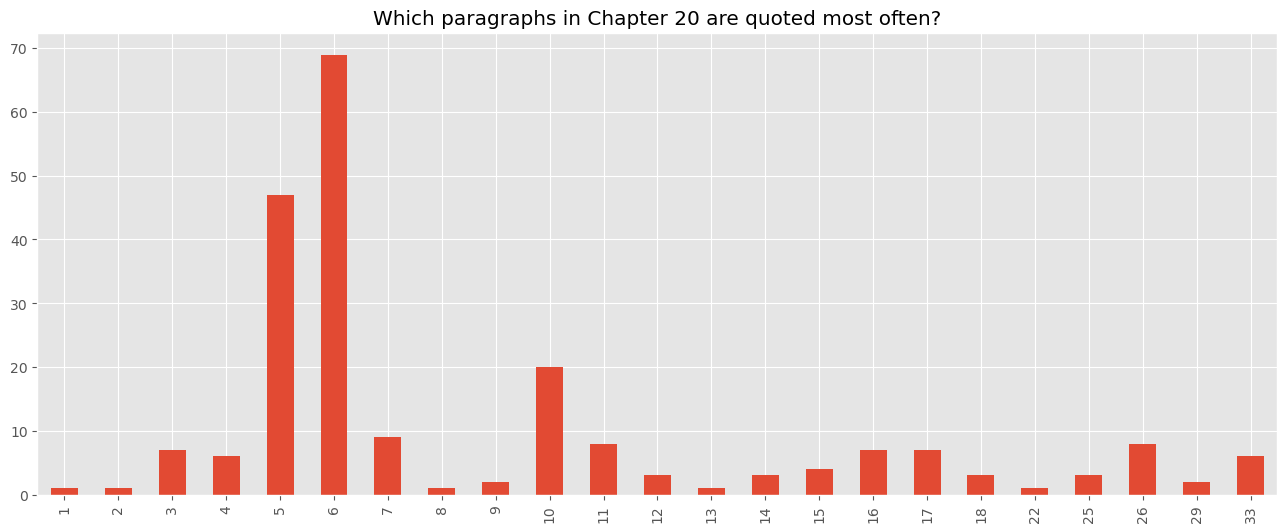

In [162]:
pd.Series(dict(grandTally)).sort_index().plot(kind='bar', title="Which paragraphs in Chapter 20 are quoted most often?")

In [163]:
print(mm[xxParaLocations[5]:xxParaLocations[7]]) # What are paragraphs #5 and #6? 



To those who have looked at Rome with the quickening power of a
knowledge which breathes a growing soul into all historic shapes, and
traces out the suppressed transitions which unite all contrasts, Rome
may still be the spiritual centre and interpreter of the world.  But
let them conceive one more historical contrast: the gigantic broken
revelations of that Imperial and Papal city thrust abruptly on the
notions of a girl who had been brought up in English and Swiss
Puritanism, fed on meagre Protestant histories and on art chiefly of
the hand-screen sort; a girl whose ardent nature turned all her small
allowance of knowledge into principles, fusing her actions into their
mould, and whose quick emotions gave the most abstract things the
quality of a pleasure or a pain; a girl who had lately become a wife,
and from the enthusiastic acceptance of untried duty found herself
plunged in tumultuous preoccupation with her personal lot.  The weight
of unintelligible Rome might lie easily on b

# *Middlemarch* quotations, by journal

- [Descriptive statistics on journals in JSTOR dataset](#Descriptive-statistics-on-journals-in-JSTOR-dataset)
	- [*Middlemarch* quotations per chapter, by journal, stacked bar chart](#Middlemarch-quotations-per-chapter,-by-journal,-stacked-bar-chart)
	- [*George Eliot - George Henry Lewes Studies* (*GE-GHLS*)](#George-Eliot---George-Henry-Lewes-Studies-(GE-GHLS))
		- [*GE-GHLS*: *Middlemarch* quotations per chapter](#GE-GHLS:-Middlemarch-quotations-per-chapter)
        - [Diachronic Analysis of *GE-GHLS* Quotations](#Diachronic-Analysis-of-GE-GHLS-Quotations)
		- [*GE-GHLS*: *Middlemarch* quotations per chapter, per decade (not normalized or weighted)](#GE-GHLS:-Middlemarch-quotations-per-chapter,-per-decade-(not-normalized-or-weighted))
		- [*GE-GHLS*: *Middlemarch* quotations per chapter, per decade (not normalized or weighted), heat map](#GE-GHLS:-Middlemarch-quotations-per-chapter,-per-decade-(not-normalized-or-weighted),-heat-map)
		- [*GE-GHLS*: *Middlemarch* quotations per chapter, per decade (normalized by decade and weighted by word count)](#GE-GHLS:-Middlemarch-quotations-per-chapter,-per-decade-(normalized-by-decade-and-weighted-by-word-count))
		- [*GE-GHLS*: *Middlemarch* quotations per chapter, per decade (normalized and weighted), heat map](#GE-GHLS:-Middlemarch-quotations-per-chapter,-per-decade-(normalized-and-weighted),-heat-map)
		- [Compare the specialist journal, *George Eliot - George Henry Lewes Studies*, with all other journals](#Compare-the-specialist-journal,-George-Eliot---George-Henry-Lewes-Studies,-with-all-other-journals)
	- [*Victorian Studies*](#Victorian-Studies)
		- [*Victorian Studies*: *Middlemarch* quotations per chapter](#Victorian-Studies:-Middlemarch-quotations-per-chapter)
		- [Diachronic Analysis of *Victorian Studies* Quotations](#Diachronic-Analysis-of-Victorian-Studies-Quotations)
		- [*Victorian Studies*: *Middlemarch* quotations per book, per decade (normalized and weighted), heat map](#Victorian-Studies:-Middlemarch-quotations-per-book,-per-decade-(normalized-and-weighted),-heat-map)
		- [*Victorian Studies*: *Middlemarch* quotations per book, per decade (not normalized or weighted)](#Victorian-Studies:-Middlemarch-quotations-per-book,-per-decade-(not-normalized-or-weighted))
		- [*Victorian Studies*: *Middlemarch* quotations per book, per decade (not normalized or weighted), heat map](#Victorian-Studies:-Middlemarch-quotations-per-book,-per-decade-(not-normalized-or-weighted),-heat-map)
		- [*Victorian Studies*: *Middlemarch* quotations per chapter, per decade (not normalized or weighted)](#Victorian-Studies:-Middlemarch-quotations-per-chapter,-per-decade-(not-normalized-or-weighted))
        - [*Victorian Studies*: *Middlemarch* quotations per chapter, per decade (not normalized or weighted), heat map](#Victorian-Studies:-Middlemarch-quotations-per-chapter,-per-decade-(not-normalized-or-weighted),-heat-map)
		- [*Victorian Studies*: *Middlemarch* quotations per chapter, per decade (normalized by decade and weighted by word count)](#Victorian-Studies:-Middlemarch-quotations-per-chapter,-per-decade-(normalized-by-decade-and-weighted-by-word-count))
		- [*Victorian Studies*: *Middlemarch* quotations per chapter, per decade (normalized and weighted), heat map](#Victorian-Studies:-Middlemarch-quotations-per-chapter,-per-decade-(normalized-and-weighted),-heat-map)
		- [*Victorian Studies* Chapter 15](#Victorian-Studies-Chapter-15)
	- [All Victorianist journals](#All-Victorianist-journals)
		- [Victorianist journals: *Middlemarch* quotations per chapter](#Victorianist-journals:-Middlemarch-quotations-per-chapter)
		- [Diachronic Analysis of Victorianist Journals Quotations](#Diachronic-Analysis-of-Victorianist-Journals-Quotations)
		- [Victorianist journals: *Middlemarch* quotations per book, per decade (normalized and weighted), heat map](#Victorianist-journals:-Middlemarch-quotations-per-book,-per-decade-(normalized-and-weighted),-heat-map)
		- [Victorianist journals: *Middlemarch* quotations per book, per decade (not normalized or weighted)](#Victorianist-journals:-Middlemarch-quotations-per-book,-per-decade-(not-normalized-or-weighted))
		- [Victorianist journals: *Middlemarch* quotations per book, per decade (not normalized or weighted), heat map](#Victorianist-journals:-Middlemarch-quotations-per-book,-per-decade-(not-normalized-or-weighted),-heat-map)
		- [Victorianist journals: *Middlemarch* quotations per chapter, per decade (not normalized or weighted)](#Victorianist-journals:-Middlemarch-quotations-per-chapter,-per-decade-(not-normalized-or-weighted))
		- [Victorianist journals: *Middlemarch* quotations per chapter, per decade (not normalized or weighted), heat map](#Victorianist-journals:-Middlemarch-quotations-per-chapter,-per-decade-(not-normalized-or-weighted),-heat-map)
		- [Victorianist journals: *Middlemarch* quotations per chapter, per decade (normalized by decade and weighted by word count)](#Victorianist-journals:-Middlemarch-quotations-per-chapter,-per-decade-(normalized-by-decade-and-weighted-by-word-count))
		- [Victorianist journals: *Middlemarch* quotations per chapter, per decade (normalized and weighted), heat map](#Victorianist-journals:-Middlemarch-quotations-per-chapter,-per-decade-(normalized-and-weighted),-heat-map)
		- [Most Distinctive Words: Victorianist Journals vs. Non-Victorianist Journals](#Most-Distinctive-Words:-Victorianist-Journals-vs.-Non-Victorianist-Journals)


## Descriptive statistics on journals in JSTOR dataset

In [164]:
# Top 10 journals with most articles in our dataset
df['journal'] = df['isPartOf']
journalStats = df['journal'].value_counts()
print("Journal   |    Number of articles in our dataset")
journalStats[:10]

Journal   |    Number of articles in our dataset


Victorian Studies                            459
George Eliot - George Henry Lewes Studies    231
The Modern Language Review                   192
Nineteenth-Century Fiction                   192
The Review of English Studies                190
PMLA                                         154
NOVEL: A Forum on Fiction                    148
Nineteenth-Century Literature                139
Studies in the Novel                         124
ELH                                          102
Name: journal, dtype: int64

In [165]:
journalList = journalStats.index

In [166]:
journals = pd.DataFrame({title: synchronicAnalysis(df.loc[df['journal'] == title]) for title in journalList }).T

In [167]:
cutoff = 1500
topJournals = journals.loc[journals.sum(axis=1) > cutoff]
otherJournals = journals.loc[journals.sum(axis=1) < cutoff]
topJournals.loc['Other'] = otherJournals.sum()

/var/folders/hg/n067xqnn1nbbk0txk1mdhcq80000gn/T/ipykernel_49489/1477629281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topJournals.loc['Other'] = otherJournals.sum()


### *Middlemarch* quotations per chapter, by journal, stacked bar chart

<Axes: title={'center': 'Middlemarch quotations per chapter, by journal'}>

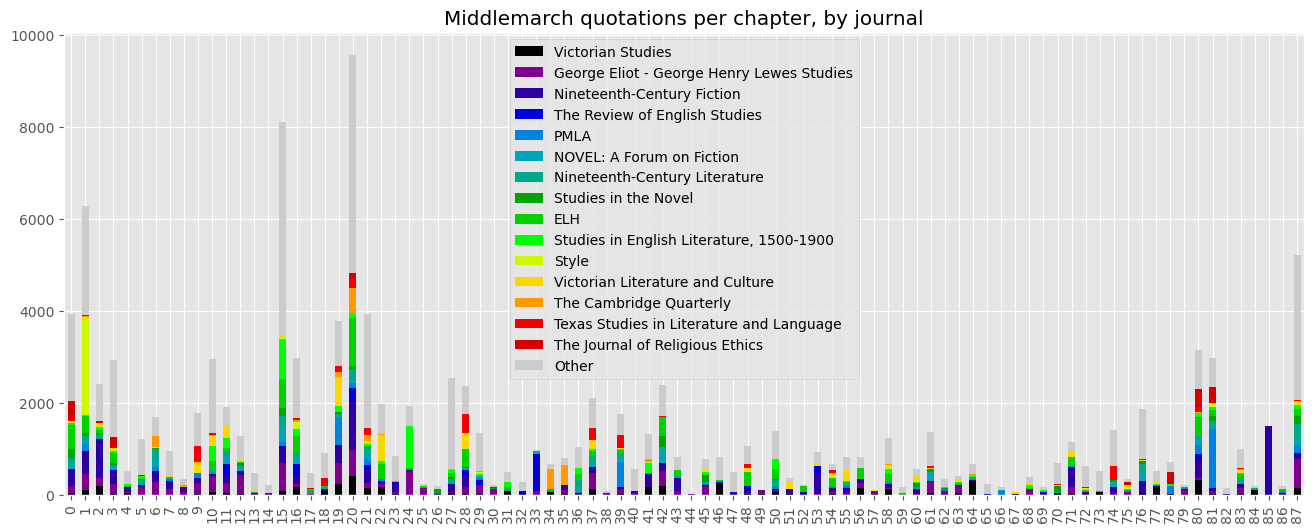

In [168]:
topJournals.T.plot(kind='bar', title="Middlemarch quotations per chapter, by journal", stacked=True, colormap='nipy_spectral')

In [169]:
#ax = topJournals.T.plot(kind='bar', stacked=True, colormap='nipy_spectral')
#fig = ax.get_figure()
#fig.savefig('synchronic-journals.png', bboxinches='tight', dpi=300)

In [170]:
# Print the total number of journals
len(journalStats)

789

### Statistics on Victorianist journals in the dataset

For full list of journals classified as "Victorianist," see below.

Downloadable link: [CSV with complete list of Victorianist-classified journals](https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/data/list-of-Victorianist-journals.csv)

In [171]:
list_of_VS_journals = ['Victorian Studies', 'George Eliot - George Henry Lewes Studies', 'Nineteenth-Century Fiction', 'Nineteenth-Century Literature', 'Dickens Studies Annual', 'Victorian Literature and Culture', 'Victorian Review', 'The George Eliot, George Henry Lewes Newsletter', 'Victorian Periodicals Review', 'Dickens Quarterly', 'Victorian Poetry', 'The Thomas Hardy Journal', 'The Gaskell Society Journal', 'The Gaskell Journal', 'Newsletter of the Victorian Studies Association of Western Canada', 'Dickens Studies Newsletter', 'Browning Institute Studies', 'Victorian Periodicals Newsletter', 'Carlyle Studies Annual', 'Conradiana', 'Tennyson Research Bulletin', 'The Conradian', 'The Hardy Society Journal', 'The Hardy Review', 'Studies in Browning and His Circle', 'Nineteenth-Century French Studies', 'The Wilkie Collins Journal', 'Carlyle Newsletter', 'The Wildean', 'Dickens Studies', 'Carlyle Annual', '19th-Century Music', 'The Trollopian', 'Conrad Studies']

In [172]:
print("LIST OF VICTORIANIST JOURNALS \n")
for item in list_of_VS_journals:
    print(item)

LIST OF VICTORIANIST JOURNALS 

Victorian Studies
George Eliot - George Henry Lewes Studies
Nineteenth-Century Fiction
Nineteenth-Century Literature
Dickens Studies Annual
Victorian Literature and Culture
Victorian Review
The George Eliot, George Henry Lewes Newsletter
Victorian Periodicals Review
Dickens Quarterly
Victorian Poetry
The Thomas Hardy Journal
The Gaskell Society Journal
The Gaskell Journal
Newsletter of the Victorian Studies Association of Western Canada
Dickens Studies Newsletter
Browning Institute Studies
Victorian Periodicals Newsletter
Carlyle Studies Annual
Conradiana
Tennyson Research Bulletin
The Conradian
The Hardy Society Journal
The Hardy Review
Studies in Browning and His Circle
Nineteenth-Century French Studies
The Wilkie Collins Journal
Carlyle Newsletter
The Wildean
Dickens Studies
Carlyle Annual
19th-Century Music
The Trollopian
Conrad Studies


In [173]:
len(list_of_VS_journals)

34

In [174]:
just_VS_journals_quotes = articlesWithMatches[articlesWithMatches['isPartOf'].isin(list_of_VS_journals)]

In [175]:
# Number of Victorianist articles containing matches
len(just_VS_journals_quotes)

429

In [176]:
just_VS_journals_quotes['isPartOf'].value_counts()

George Eliot - George Henry Lewes Studies                            106
Victorian Studies                                                     78
Nineteenth-Century Fiction                                            68
Nineteenth-Century Literature                                         37
Victorian Literature and Culture                                      37
Dickens Studies Annual                                                19
Victorian Review                                                      13
Victorian Poetry                                                      12
The George Eliot, George Henry Lewes Newsletter                       11
Victorian Periodicals Review                                           8
Dickens Quarterly                                                      5
The Thomas Hardy Journal                                               5
The Gaskell Society Journal                                            4
Browning Institute Studies                         

In [177]:
articlesWithMatches['isPartOf'].value_counts()

George Eliot - George Henry Lewes Studies    106
Victorian Studies                             78
Nineteenth-Century Fiction                    68
PMLA                                          47
ELH                                           42
                                            ... 
Science                                        1
Transformation of Rage                         1
Anglican and Episcopal History                 1
The Journal of Ethics                          1
Sociological Forum                             1
Name: isPartOf, Length: 403, dtype: int64

In [178]:
# Number of matches from Victorianist journals
just_VS_journals_quotes['numMatches'].sum()

1258

In [179]:
# Number of matches from the journal *Victorian Studies*
just_VS_journals_quotes[just_VS_journals_quotes['isPartOf']== "Victorian Studies"].numMatches.sum()

150

In [180]:
# Number of matches, overall
articlesWithMatches['numMatches'].sum()

3800

#### Proportion of matches from Victorianist journals

In [181]:
# What proportion of matches come from Victorianist journals?
just_VS_journals_quotes['numMatches'].sum() / articlesWithMatches['numMatches'].sum()

0.3310526315789474

## *George Eliot - George Henry Lewes Studies* (*GE-GHLS*)

### Articles where journal title is *George Eliot - George Henry Lewes Studies*

In [182]:
geJournals = df.loc[df['journal'] == 'George Eliot - George Henry Lewes Studies']

In [183]:
pd.set_option('display.max_columns', 207)

In [184]:
geJournals 

creator datePublished        docSubType  docType  \
37    [ELIZABETH WINSTON]    1995-09-01       book-review  article   
76      [Katherine Newey]    2011-09-01  research-article  article   
101                  None    2015-11-01             other  article   
107     [AVROM FLEISHMAN]    2008-09-01  research-article  article   
108        [Judith Adler]    2018-10-01  research-article  article   
...                   ...           ...               ...      ...   
5798  [TERENCE R. WRIGHT]    1995-09-01       book-review  article   
5835     [SALEEL NURBHAI]    1997-09-01  research-article  article   
5853       [DONALD HAWES]    2001-09-01  research-article  article   
5865                 None    1995-09-01              misc  article   
5876        [BUFF LINDAU]    2013-10-01  research-article  article   

                                                     id  \
37                 http://www.jstor.org/stable/43595523   
76                 http://www.jstor.org/stable/42827892   
101   http://www.jstor.org/stable/10.5325/georeliogh...   
107                http://www.jstor.org/stable/42827960   
108   http://www.jstor.org/stable/10.5325/georeliogh...   
...                                                 ...   
5798               http://www.jstor.org/stable/43595524   
5835               http://www.jstor.org/stable/42827636   
5853               http://www.jstor.org/stable/42827734   
5865               http://www.jstor.org/stable/43595525   
5876               http://www.jstor.org/stable/42827928   

                                             identifier  \
37    [{'name': 'issn', 'value': '23721901'}, {'name...   
76    [{'name': 'issn', 'value': '23721901'}, {'name...   
101   [{'name': 'issn', 'value': '23721901'}, {'name...   
107   [{'name': 'issn', 'value': '23721901'}, {'name...   
108   [{'name': 'issn', 'value': '23721901'}, {'name...   
...                                                 ...   
5798  [{'name': 'issn', 'value': '23721901'}, {'name...   
5835  [{'name': 'issn', 'value': '23721901'}, {'name...   
5853  [{'name': 'issn', 'value': '23721901'}, {'name...   
5865  [{'name': 'issn', 'value': '23721901'}, {'name...   
5876  [{'name': 'issn', 'value': '23721901'}, {'name...   

                                       isPartOf issueNumber language  \
37    George Eliot - George Henry Lewes Studies       28/29    [eng]   
76    George Eliot - George Henry Lewes Studies       60/61    [eng]   
101   George Eliot - George Henry Lewes Studies           2    [eng]   
107   George Eliot - George Henry Lewes Studies       54/55    [eng]   
108   George Eliot - George Henry Lewes Studies           2    [eng]   
...                                         ...         ...      ...   
5798  George Eliot - George Henry Lewes Studies       28/29    [eng]   
5835  George Eliot - George Henry Lewes Studies       32/33    [eng]   
5853  George Eliot - George Henry Lewes Studies       40/41    [eng]   
5865  George Eliot - George Henry Lewes Studies       28/29    [eng]   
5876  George Eliot - George Henry Lewes Studies       64/65    [eng]   

                    outputFormat  pageCount pageEnd pageStart   pagination  \
37    [unigram, bigram, trigram]        6.0     106       101  pp. 101-106   
76    [unigram, bigram, trigram]       16.0     141       126  pp. 126-141   
101   [unigram, bigram, trigram]        2.0      ii         i     pp. i-ii   
107   [unigram, bigram, trigram]       79.0      76         1     pp. 1-76   
108   [unigram, bigram, trigram]       29.0     171       143  pp. 143-171   
...                          ...        ...     ...       ...          ...   
5798  [unigram, bigram, trigram]        3.0     109       107  pp. 107-109   
5835  [unigram, bigram, trigram]       18.0      18         1     pp. 1-18   
5853  [unigram, bigram, trigram]        8.0      75        68    pp. 68-75   
5865  [unigram, bigram, trigram]        5.0    None      None         None   
5876  [unigram, bigram, trigram]    

In [185]:
print(geJournals.title)

37                                         Review Article
76      The "British Matron" and the Poetic Drama: The...
101                                          Front Matter
107          GEORGE ELIOT'S READING: A CHRONOLOGICAL LIST
108     Hidden Allusion in the Finale of <em>Middlemar...
                              ...                        
5798                                       Review Article
5835                JEWISH MYTH IN GEORGE ELIOT'S FICTION
5853    GEORGE ELIOT AND GEORGE HENRY LEWES: SELECTED ...
5865                                          Back Matter
5876                                  A GEORGE ELIOT NOTE
Name: title, Length: 231, dtype: object


In [186]:
print("Number of articles where journal title is 'George ELiot - George Henry Lewes Studies':")
len(geJournals)

Number of articles where journal title is 'George ELiot - George Henry Lewes Studies':


231

### *GE-GHLS*: *Middlemarch* quotations per chapter

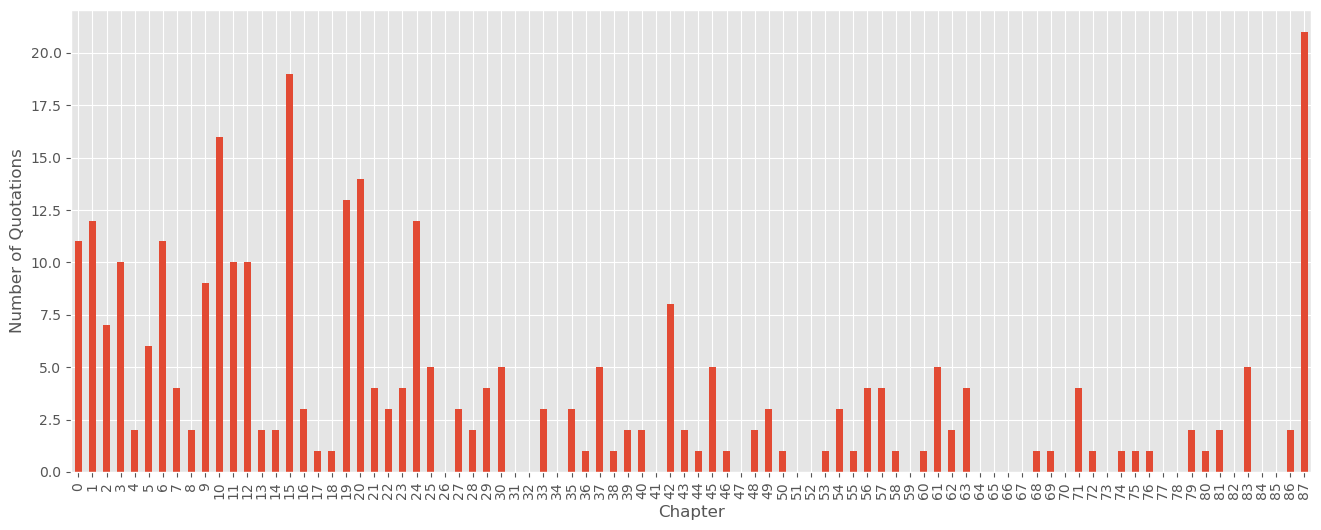

In [187]:
plotSynchronicAnalysis(synchronicAnalysis(geJournals, useWordcounts=False), useWordcounts=False)

### Diachronic Analysis of *GE-GHLS* Quotations

In [188]:
# Weighted by wordcount (by the number of words in the quotation) and normalized by decade(counts are scaled to the maximum value per decade)
GEGHLSbooksDiaDF = diachronicAnalysis(geJournals, decades=(1990, 2020), bins=bookLocations, useWordcounts=True, normalize=True).sort_index()
print('GE-GHLS Quotations per book, per decade (weighted by length of quotation and normalized by decade):')
GEGHLSbooksDiaDF

GE-GHLS Quotations per book, per decade (weighted by length of quotation and normalized by decade):


0         1         2         3         4         5         6  \
1990  0.0  1.000000  0.658422  0.133021  0.121658  0.098930  0.116310   
2000  0.0  0.832359  0.805068  0.736842  1.000000  0.508772  0.666667   
2010  0.0  1.000000  0.613139  0.811436  0.364964  0.004866  0.074209   

             7         8  
1990  0.097594  0.231283  
2000  0.249513  0.586745  
2010  0.209246  0.542579

In [189]:
GEGHLSbooksDiaDF['decade'] = GEGHLSbooksDiaDF.index

In [190]:
GEGHLSbooksMelted = GEGHLSbooksDiaDF.melt(id_vars='decade', var_name='book')

In [191]:
# cut out erroneous "book 0" material (ie title page)
GEGHLSbooksMelted = GEGHLSbooksMelted[GEGHLSbooksMelted.book != 0]

### *GE-GHLS*: *Middlemarch* quotations per book, per decade (normalized and weighted)

In [192]:
# Raw quotation counts (not weighted by the number of words in the quoatation or normalized by decade)
# Turning on useWordcounts makes it so that it's weighted by wordcount. Turning it off uses raw numbers of quotations.
GEGHLSbooksNotNormalizedNotWeightedDiaDF = diachronicAnalysis(geJournals, decades=(1960, 2020), bins=bookLocations,\
                                                        useWordcounts=False, normalize=False).sort_index()
print('Number of quotations per book, per decade in GE-GHLS')
GEGHLSbooksNotNormalizedNotWeightedDiaDF

Number of quotations per book, per decade in GE-GHLS


0   1   2   3   4  5   6  7   8
1990  0  60  22  10   4  6   5  3  12
2000  0  16  19  11  11  9  12  3   9
2010  0  34  21  17   7  1   4  4  16

In [193]:
GEGHLSbooksNotNormalizedNotWeightedDiaDF['decade'] = GEGHLSbooksNotNormalizedNotWeightedDiaDF.index

In [194]:
GEGHLSbooksNotNormalizedNotWeightedDiaDFMelted = GEGHLSbooksNotNormalizedNotWeightedDiaDF.melt(id_vars='decade', var_name='book')

In [195]:
# cut out erroneous "book 0" material (ie title page)
GEGHLSbooksNotNormalizedNotWeightedDiaDFMelted = GEGHLSbooksNotNormalizedNotWeightedDiaDFMelted[GEGHLSbooksNotNormalizedNotWeightedDiaDFMelted.book != 0]

### *GE-GHLS*: *Middlemarch* quotations per chapter, per decade (not normalized or weighted)

In [196]:
# Raw quotation counts (not weighted by the number of words in the quoatation or normalized by decade)
# Turning on useWordcounts makes it so that it's weighted by wordcount. Turning it off uses raw numbers of quotations.
GEGHLSdiaDFquoteOnly = diachronicAnalysis(geJournals, decades=(1960, 2020), bins=chapterLocations, useWordcounts=False, normalize=False).sort_index()
GEGHLSdiaDFquoteOnly.columns.name ='chapter'
GEGHLSdiaDFquoteOnly.index.name = 'decade'

In [197]:
GEGHLSdiaDFquoteOnly

chapter  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  \
decade                                                                        
1990      1   5   2   6   1   5   7   3   1   2  10  10   7   2   1   6   0   
2000      2   1   2   3   1   0   0   0   0   3   4   0   0   0   1   9   3   
2010      8   6   3   1   0   1   4   1   1   4   2   0   3   0   0   4   0   

chapter  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
decade                                                                        
1990      0   0   2   8   2   1   0   1   2   0   2   1   1   0   0   0   3   
2000      0   1   2   3   0   0   0   2   2   0   1   1   0   5   0   0   0   
2010      1   0   9   3   2   2   4   9   1   0   0   0   3   0   0   0   0   

chapter  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  \
decade                                                                        
1990      0   1   0   3   0   0   0   0   0   1   0   4   1   0   0   0   0   
2000      0   0   0   2   1   1   1   0   6   1   1   1   0   0   2   3   1   
2010      0   2   1   0   0   1   1   0   2   0   0   0   0   0   0   0   0   

chapter  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  \
decade                                                                        
1990      0   0   0   0   0   2   1   0   0   0   2   0   0   0   0   0   0   
2000      0   0   0   3   0   1   3   0   0   0   3   2   0   0   0   0   0   
2010      0   0   1   0   1   1   0   1   0   1   0   0   4   0   0   0   0   

chapter  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  \
decade                                                                        
1990      0   0   0   3   0   0   1   0   1   0   0   2   0   0   0   2   0   
2000      1   1   0   1   0   0   0   1   0   0   0   0   0   2   0   2   0   
2010      0   0   0   0   1   0   0   0   0   0   0   0   1   0   0   1   0   

chapter  85  86  87  
decade               
1990      0   2   4  
2000      0   0   4  
2010      0   0  13

In [198]:
GEGHLSdiaDFquoteOnly['decade'] = GEGHLSdiaDFquoteOnly.index

In [199]:
GEGHLSdiaDFquoteOnlyMelted = GEGHLSdiaDFquoteOnly.melt(id_vars='decade')

### *GE-GHLS*: *Middlemarch* quotations per chapter, per decade (not normalized or weighted), heat map

In [200]:
alt.Chart(GEGHLSdiaDFquoteOnlyMelted, title="GE-GHLS Middlemarch quotations per chapter, per decade (not weighted or normalized)")\
.mark_rect().encode(x=alt.X('chapter', title="Chapter", type='ordinal', axis=alt.Axis(labelAngle=0, values=list(range(0, 87, 5)))), 
                    y=alt.Y('decade', title="Decade",type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                                        color=alt.Color('value', legend=alt.Legend(title="Number of Quotations")))\
.properties(width=1000, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
) 

alt.Chart(...)

### *GE-GHLS*: *Middlemarch* quotations per chapter, per decade (normalized by decade and weighted by word count)

In [201]:
# Weighted by wordcount (by the number of words in the quoatation) and normalized by decade(counts are scaled to the maximum value per decade)
GEGHLSnormalizeddiaDF = diachronicAnalysis(geJournals, decades=(1960, 2020), bins=chapterLocations, useWordcounts=True, normalize=True).sort_index()
GEGHLSnormalizeddiaDF.columns.name = 'chapter'
GEGHLSnormalizeddiaDF.index.name = 'decade'

In [202]:
GEGHLSnormalizeddiaDF

chapter        0         1         2         3         4         5         6   \
decade                                                                          
1990     0.017699  0.353982  0.042035  0.258850  0.015487  0.329646  0.320796   
2000     0.091575  0.161172  0.139194  0.238095  0.032967  0.000000  0.000000   
2010     0.288939  0.349887  0.273138  0.045147  0.000000  0.018059  0.275395   

chapter        7         8         9         10        11        12        13  \
decade                                                                          
1990     0.196903  0.070796  0.159292  0.358407  0.482301  0.703540  0.050885   
2000     0.000000  0.000000  0.457875  0.443223  0.000000  0.000000  0.000000   
2010     0.079007  0.049661  0.108352  0.139955  0.000000  0.227991  0.000000   

chapter        14        15        16        17        18        19        20  \
decade                                                                          
1990     0.057522  0.599558  0.000000  0.000000  0.000000  0.387168  1.000000   
2000     0.043956  1.000000  0.194139  0.000000  0.018315  0.080586  0.175824   
2010     0.000000  0.142212  0.000000  0.011287  0.000000  0.564334  0.158014   

chapter        21        22        23        24        25   26        27  \
decade                                                                     
1990     0.066372  0.017699  0.000000  0.108407  0.057522  0.0  0.050885   
2000     0.000000  0.000000  0.000000  0.076923  0.395604  0.0  0.018315   
2010     0.160271  0.101580  0.081264  1.000000  0.009029  0.0  0.000000   

chapter        28        29        30   31   32        33   34        35  \
decade                                                                     
1990     0.011062  0.026549  0.000000  0.0  0.0  0.185841  0.0  0.039823   
2000     0.468864  0.000000  0.424908  0.0  0.0  0.000000  0.0  0.000000   
2010     0.000000  0.415350  0.000000  0.0  0.0  0.000000  0.0  0.178330   

chapter        36        37        38        39        40   41        42  \
decade                                                                     
1990     0.000000  0.362832  0.000000  0.000000  0.000000  0.0  0.000000   
2000     0.000000  0.703297  0.106227  0.146520  0.018315  0.0  0.904762   
2010     0.045147  0.000000  0.000000  0.173815  0.085779  0.0  0.194131   

chapter        43        44        45        46   47        48        49  \
decade                                                                     
1990     0.037611  0.000000  0.276549  0.013274  0.0  0.000000  0.000000   
2000     0.223443  0.014652  0.219780  0.000000  0.0  0.131868  0.311355   
2010     0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   

chapter        50   51   52        53        54        55        56        57  \
decade                                                                          
1990     0.000000  0.0  0.0  0.000000  0.000000  0.000000  0.081858  0.008850   
2000     0.054945  0.0  0.0  0.000000  0.164835  0.000000  0.201465  0.238095   
2010     0.000000  0.0  0.0  0.009029  0.000000  0.058691  0.054176  0.000000   

chapter        58   59        60        61        62        63   64   65   66  \
decade                                                                          
1990     0.000000  0.0  0.000000  0.294248  0.000000  0.000000  0.0  0.0  0.0   
2000     0.000000  0.0  0.000000  0.402930  0.245421  0.000000  0.0  0.0  0.0   
2010     0.013544  0.0  0.011287  0.000000  0.000000  0.388262  0.0  0.0  0.0   

chapter   67        68        69   70        71        72   73        74  \
decade                                                                     
1990     0.0  0.000000  0.000000  0.0  0.323009  0.000000  0.0  0.066372   
2000     0.0  0.413919  0.029304  0.0  0.025641  0.000000  0.0  0.000000   
2010     0.0  0.000000  0.000000  0.0  0.000000  0.038375  0.0  0.000000   

chapter        75        76   77   78        79        80        

In [203]:
GEGHLSnormalizeddiaDF['decade'] = GEGHLSnormalizeddiaDF.index

In [204]:
GEGHLSnormalizeddiaMelted = GEGHLSnormalizeddiaDF.melt(id_vars='decade')

### *GE-GHLS*: *Middlemarch* quotations per chapter, per decade (normalized and weighted), heat map
Because our corpus contains [varying numbers of JSTOR texts per decade](#How-many-articles-do-we-have-published-in-each-year?), we've decided to also weigh by length of quotation and normalize per decade.

In [205]:
alt.Chart(GEGHLSnormalizeddiaMelted, title="GE-GHLS Middlemarch quotations per chapter, per decade (normalized by decade and weighted by word count)")\
.mark_rect().encode(x=alt.X('chapter', title="Chapter", type='ordinal', axis=alt.Axis(labelAngle=0, values=list(range(0, 87, 5)))), 
                    y=alt.Y('decade', title="Decade",type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                                        color=alt.Color('value', legend=alt.Legend(title="Amount Quoted")))\
.properties(width=1000, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
)  

alt.Chart(...)

### Compare the specialist journal, *George Eliot - George Henry Lewes Studies*, with all other journals

In [206]:
geJournals = df.loc[df['journal'] == 'George Eliot - George Henry Lewes Studies']
otherJournals = df.loc[df['journal'] != 'George Eliot - George Henry Lewes Studies']

In [207]:
# Normalize
geDF = synchronicAnalysis(geJournals)
otherDF = synchronicAnalysis(otherJournals)
normGE = geDF.div(geDF.max())
normOther = otherDF.div(otherDF.max())

Text(0, 0.5, 'Specialization Index')

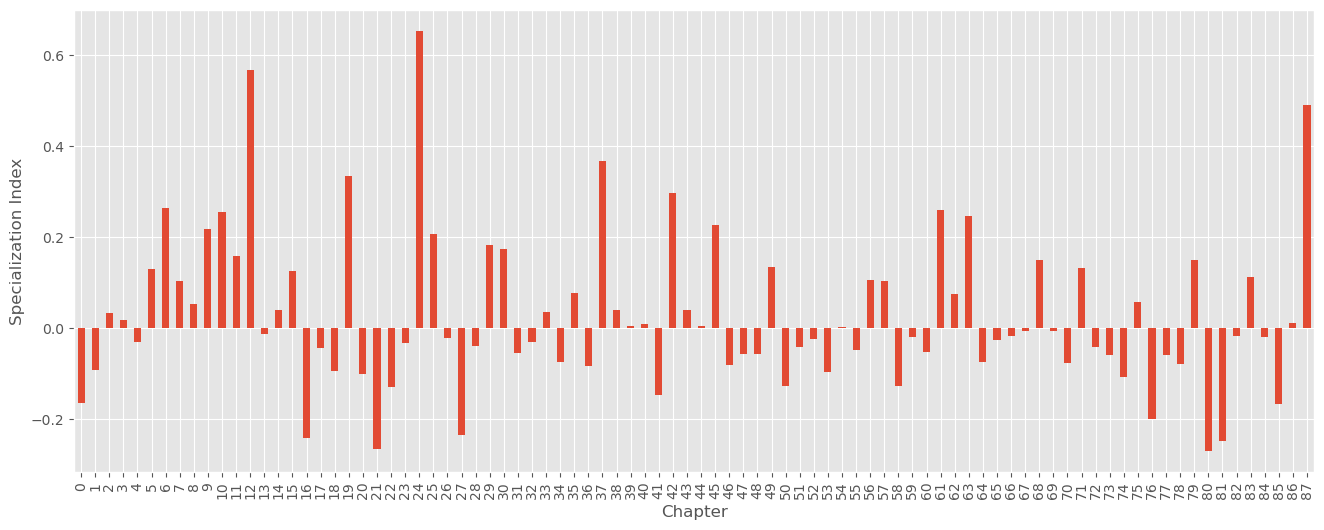

In [208]:
fig = plt.figure()
ax = (normGE - normOther).plot(kind='bar')
fig.add_subplot(ax)
ax.set_xlabel('Chapter')
ax.set_ylabel('Specialization Index')
# Save a big version for publication. 
#fig.savefig('specialization.png', bboxinches='tight', dpi=300)

## *Victorian Studies*

### Articles where journal title is *Victorian Studies*

In [209]:
vsJournals = df.loc[df['journal'] == 'Victorian Studies']

In [210]:
pd.set_option('display.max_rows', 300)

In [211]:
vsJournals 

creator datePublished        docSubType  docType  \
14        [Catherine Gallagher]    2006-10-01       book-review  article   
16       [Angelique Richardson]    2006-07-01       book-review  article   
31                         None    1960-03-01              misc  article   
39               [A. S. Crehan]    1976-03-01  research-article  article   
41          [Ronald E. Freeman]    1968-06-01              misc  article   
...                         ...           ...               ...      ...   
5872  [Chris R. Vanden Bossche]    1987-07-01       book-review  article   
5873               [Anita Levy]    1996-04-01       book-review  article   
5874                       None    1990-07-01              misc  article   
5875                       None    2011-10-01              misc  article   
5882          [Edward H. Cohen]    1990-07-01              misc  article   

                                                     id  \
14                  http://www.jstor.org/stable/4618956   
16                  http://www.jstor.org/stable/4618943   
31                  http://www.jstor.org/stable/3825496   
39                  http://www.jstor.org/stable/3826133   
41                  http://www.jstor.org/stable/3825239   
...                                                 ...   
5872                http://www.jstor.org/stable/3828188   
5873                http://www.jstor.org/stable/3829465   
5874                http://www.jstor.org/stable/3827789   
5875  http://www.jstor.org/stable/10.2979/victorians...   
5882                http://www.jstor.org/stable/3827815   

                                             identifier           isPartOf  \
14    [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   
16    [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   
31    [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   
39    [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   
41    [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   
...                                                 ...                ...   
5872  [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   
5873  [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   
5874  [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   
5875  [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   
5882  [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   

     issueNumber language                outputFormat  pageCount pageEnd  \
14             1    [eng]  [unigram, bigram, trigram]        3.0     111   
16             4    [eng]  [unigram, bigram, trigram]        4.0     769   
31             3    [eng]  [unigram, bigram, trigram]        6.0     316   
39             3    [eng]  [unigram, bigram, trigram]       31.0     409   
41             4    [eng]  [unigram, bigram, trigram]       60.0     614   
...          ...      ...                         ...        ...     ...   
5872           4    [eng]  [unigram, bigram, trigram]        2.0     556   
5873           3    [eng]  [unigram, bigram, trigram]        3.0     431   
5874           4    [eng]  [unigram, bigram, trigram]       10.0     826   
5875           1    [eng]  [unigram, bigram, trigram]        7.0     190   
5882           4    [eng]  [unigram, bigram, trigram]      132.0     812   

     pageStart   pagination provider  publicationYear  \
14         109  pp. 109-111    jstor             2006   
16         766  pp. 766-769    jstor             2006   
31         297  pp. 297-316    jstor             1960   
39         379  pp. 379-409    jstor             1976   
41         555  pp. 555-614    jstor             1968   
...        ...          ...      ...              ...   
5872       555  pp. 555-556    jstor             1987   
5873       429  pp. 429-431    jstor             1996   
5874       817  pp. 817-826    jstor   

In [212]:
print("Number of  articles where journal title is 'Victorian Studies':")
len(vsJournals)

Number of  articles where journal title is 'Victorian Studies':


459

### *Victorian Studies*: *Middlemarch* quotations per chapter

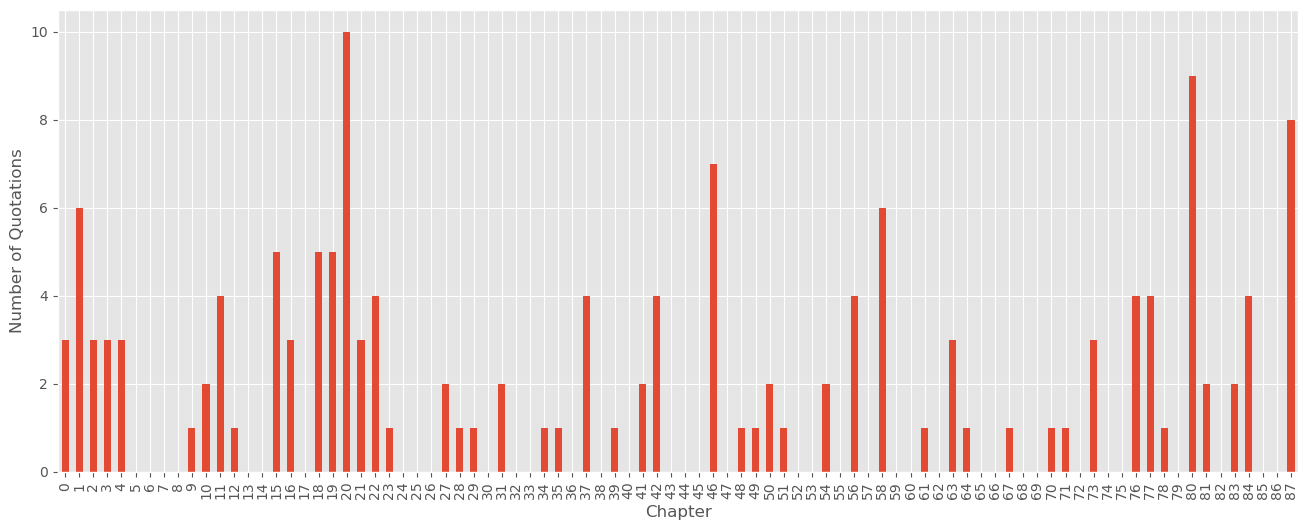

In [213]:
plotSynchronicAnalysis(synchronicAnalysis(vsJournals, useWordcounts=False), useWordcounts=False)

### Diachronic Analysis of *Victorian Studies* Quotations

In [214]:
# Weighted by wordcount (by the number of words in the quotation) and normalized by decade(counts are scaled to the maximum value per decade)
VSbooksDiaDF = diachronicAnalysis(vsJournals, decades=(1960, 2020), bins=bookLocations, useWordcounts=True, normalize=True).sort_index()
print('Victorian Studies Quotations per book, per decade (weighted by length of quotation and normalized by decade):')
VSbooksDiaDF

Victorian Studies Quotations per book, per decade (weighted by length of quotation and normalized by decade):


0         1         2         3         4         5         6  \
1960  0.0  1.000000  0.067227  0.336134  0.000000  0.000000  0.218487   
1970  0.0  0.121107  0.820069  0.000000  0.688581  0.349481  0.480969   
1980  0.0  1.000000  0.486111  0.000000  0.000000  0.000000  0.250000   
1990  0.0  0.037383  0.607477  0.000000  0.000000  0.056075  0.000000   
2000  0.0  0.035264  1.000000  0.012594  0.035264  0.000000  0.000000   
2010  0.0  0.513514  1.000000  0.221622  0.591892  0.032432  0.351351   

             7         8  
1960  0.000000  0.151261  
1970  1.000000  0.318339  
1980  0.000000  0.000000  
1990  0.224299  1.000000  
2000  0.000000  0.166247  
2010  0.016216  0.589189

In [215]:
VSbooksDiaDF['decade'] = VSbooksDiaDF.index

In [216]:
VSbooksMelted = VSbooksDiaDF.melt(id_vars='decade', var_name='book')

In [217]:
# cut out erroneous "book 0" material (ie title page)
VSbooksMelted = VSbooksMelted[VSbooksMelted.book != 0]

### *Victorian Studies*: *Middlemarch* quotations per book, per decade (normalized and weighted), heat map

In [218]:
alt.Chart(VSbooksMelted, title="*Victorian Studies* Middlemarch quotations per book, per decade (normalized by decade and weighted by word count)")\
.mark_rect().encode(x=alt.X('book', title="Book", type='ordinal', axis=alt.Axis(labelAngle=0)), 
                    y=alt.Y('decade', title="Decade",type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                                        color=alt.Color('value', legend=alt.Legend(title="Amount Quoted")))\
.properties(width=500, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
) 

alt.Chart(...)

### *Victorian Studies*: *Middlemarch* quotations per book, per decade (not normalized or weighted)

In [219]:
# Raw quotation counts (not weighted by the number of words in the quoatation or normalized by decade)
# Turning on useWordcounts makes it so that it's weighted by wordcount. Turning it off uses raw numbers of quotations.
VSbooksNotNormalizedNotWeightedDiaDF = diachronicAnalysis(vsJournals, decades=(1960, 2020), bins=bookLocations,\
                                                        useWordcounts=False, normalize=False).sort_index()
print('Number of quotations per book, per decade in VS')
VSbooksNotNormalizedNotWeightedDiaDF

Number of quotations per book, per decade in VS


0  1   2  3  4  5  6  7   8
1960  0  3   1  2  0  0  1  0   1
1970  0  3   6  0  5  5  4  1   7
1980  0  4   1  0  0  0  2  0   0
1990  0  1   4  0  0  1  0  3   3
2000  0  2  10  1  2  0  0  0   6
2010  0  9  12  3  3  2  6  1  12

In [220]:
VSbooksNotNormalizedNotWeightedDiaDF['decade'] = VSbooksNotNormalizedNotWeightedDiaDF.index

In [221]:
VSbooksNotNormalizedNotWeightedDiaDFMelted = VSbooksNotNormalizedNotWeightedDiaDF.melt(id_vars='decade', var_name='book')

In [222]:
# cut out erroneous "book 0" material (ie title page)
VSbooksNotNormalizedNotWeightedDiaDFMelted = VSbooksNotNormalizedNotWeightedDiaDFMelted[VSbooksNotNormalizedNotWeightedDiaDFMelted.book != 0]

### *Victorian Studies*: *Middlemarch* quotations per book, per decade (not normalized or weighted), heat map

In [223]:
alt.Chart(VSbooksNotNormalizedNotWeightedDiaDFMelted, title="Victorian Studies Middlemarch quotations per book, per decade (not weighted or normalized by decade)")\
.mark_rect().encode(x=alt.X('book', title="Book", type='ordinal', axis=alt.Axis(labelAngle=0)), 
                    y=alt.Y('decade', title="Decade",type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                                        color=alt.Color('value', legend=alt.Legend(title="Number of Quotations")))\
.properties(width=500, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
)

alt.Chart(...)

### *Victorian Studies*: *Middlemarch* quotations per chapter, per decade (not normalized or weighted)

In [224]:
# Raw quotation counts (not weighted by the number of words in the quoatation or normalized by decade)
# Turning on useWordcounts makes it so that it's weighted by wordcount. Turning it off uses raw numbers of quotations.
VSdiaDFquoteOnly = diachronicAnalysis(vsJournals, decades=(1960, 2030), bins=chapterLocations, useWordcounts=False, normalize=False).sort_index()
VSdiaDFquoteOnly.columns.name ='chapter'
VSdiaDFquoteOnly.index.name = 'decade'

In [225]:
VSdiaDFquoteOnly

chapter  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  \
decade                                                                        
1960      0   0   1   0   1   0   0   0   0   0   1   0   0   0   0   1   0   
1970      0   1   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   
1980      0   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
1990      1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   2   1   
2000      0   0   0   1   0   0   0   0   0   1   0   0   0   0   0   1   0   
2010      1   1   2   0   2   0   0   0   0   0   1   2   0   0   0   1   1   

chapter  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
decade                                                                        
1960      0   0   0   0   0   0   1   0   0   0   1   0   0   0   0   0   0   
1970      0   1   2   0   1   2   0   0   0   0   0   0   0   0   0   0   0   
1980      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1990      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2000      0   0   2   6   1   0   0   0   0   0   1   0   0   0   0   0   0   
2010      0   4   0   4   0   2   0   0   0   0   0   0   1   0   2   0   0   

chapter  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  \
decade                                                                        
1960      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1970      0   0   0   2   0   0   0   0   3   0   0   0   5   0   0   0   0   
1980      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1990      0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
2000      0   0   0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   
2010      1   0   0   0   0   0   0   2   0   0   0   0   0   0   1   0   0   

chapter  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  \
decade                                                                        
1960      0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
1970      0   0   0   0   0   4   0   0   0   0   0   0   0   1   0   0   0   
1980      0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   
1990      0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   1   
2000      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2010      1   0   0   0   0   0   0   6   0   0   0   0   1   0   0   0   0   

chapter  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  \
decade                                                                        
1960      0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
1970      0   0   0   0   0   2   0   0   0   0   0   0   0   2   0   0   0   
1980      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1990      0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0   
2000      0   0   0   0   0   0   0   0   2   0   1   0   0   0   0   2   0   
2010      0   0   0   0   0   1   0   0   0   3   0   0   5   0   0   0   0   

chapter  85  86  87  
decade               
1960      0   0   0  
1970      0   0   3  
1980      0   0   0  
1990      0   0   1  
2000      0   0   1  
2010      0   0   3

In [226]:
VSdiaDFquoteOnly['decade'] = VSdiaDFquoteOnly.index

In [227]:
VSdiaDFquoteOnlyMelted = VSdiaDFquoteOnly.melt(id_vars='decade')

### *Victorian Studies*: *Middlemarch* quotations per chapter, per decade (not normalized or weighted), heat map

In [228]:
alt.Chart(VSdiaDFquoteOnlyMelted, title="*Victorian Studies* Middlemarch quotations per chapter, per decade (not weighted or normalized)")\
.mark_rect().encode(x=alt.X('chapter', title="Chapter", type='ordinal', axis=alt.Axis(labelAngle=0, values=list(range(0, 87, 5)))), 
                    y=alt.Y('decade', title="Decade",type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                                        color=alt.Color('value', legend=alt.Legend(title="Number of Quotations")))\
.properties(width=1000, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
) 

alt.Chart(...)

### *Victorian Studies*: *Middlemarch* quotations per chapter, per decade (normalized by decade and weighted by word count)

In [229]:
# Weighted by wordcount (by the number of words in the quoatation) and normalized by decade(counts are scaled to the maximum value per decade)
VSnormalizeddiaDF = diachronicAnalysis(vsJournals, decades=(1960, 2020), bins=chapterLocations, useWordcounts=True, normalize=True).sort_index()
VSnormalizeddiaDF.columns.name = 'chapter'
VSnormalizeddiaDF.index.name = 'decade'

In [230]:
VSnormalizeddiaDF

chapter        0         1         2         3         4    5    6    7    8   \
decade                                                                          
1960     0.000000  0.000000  1.000000  0.000000  0.134328  0.0  0.0  0.0  0.0   
1970     0.000000  0.044983  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0   
1980     0.000000  1.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0   
1990     0.042553  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0   
2000     0.000000  0.000000  0.000000  0.034749  0.000000  0.0  0.0  0.0  0.0   
2010     0.029586  0.029586  0.715976  0.000000  0.130178  0.0  0.0  0.0  0.0   

chapter        9         10        11        12   13   14        15        16  \
decade                                                                          
1960     0.000000  0.641791  0.000000  0.000000  0.0  0.0  0.119403  0.000000   
1970     0.000000  0.000000  0.076125  0.000000  0.0  0.0  0.000000  0.000000   
1980     0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.486111   
1990     0.000000  0.000000  0.000000  0.053191  0.0  0.0  0.212766  0.425532   
2000     0.019305  0.000000  0.000000  0.000000  0.0  0.0  0.027027  0.000000   
2010     0.000000  0.106509  0.112426  0.000000  0.0  0.0  0.266272  0.579882   

chapter   17        18        19       20        21        22        23   24  \
decade                                                                         
1960     0.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.253731  0.0   
1970     0.0  0.020761  0.283737  0.00000  0.024221  0.491349  0.000000  0.0   
1980     0.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.0   
1990     0.0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000  0.0   
2000     0.0  0.000000  0.455598  1.00000  0.050193  0.000000  0.000000  0.0   
2010     0.0  0.360947  0.000000  0.83432  0.000000  0.147929  0.000000  0.0   

chapter   25   26        27   28        29   30        31   32   33        34  \
decade                                                                          
1960     0.0  0.0  0.343284  0.0  0.000000  0.0  0.000000  0.0  0.0  0.000000   
1970     0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.000000   
1980     0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.000000   
1990     0.0  0.0  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0  0.000000   
2000     0.0  0.0  0.019305  0.0  0.000000  0.0  0.000000  0.0  0.0  0.000000   
2010     0.0  0.0  0.000000  0.0  0.053254  0.0  0.431953  0.0  0.0  0.295858   

chapter   35   36        37   38        39   40   41        42   43   44   45  \
decade                                                                          
1960     0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
1970     0.0  0.0  0.065744  0.0  0.000000  0.0  0.0  0.622837  0.0  0.0  0.0   
1980     0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
1990     0.0  0.0  0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.0   
2000     0.0  0.0  0.000000  0.0  0.027027  0.0  0.0  0.027027  0.0  0.0  0.0   
2010     0.0  0.0  0.000000  0.0  0.000000  0.0  1.0  0.000000  0.0  0.0  0.0   

chapter        46   47        48   49   50        51   52   53    54   55  \
decade                                                                      
1960     0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.00  0.0   
1970     0.349481  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.00  0.0   
1980     0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.25  0.0   
1990     0.063830  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.00  0.0   
2000     0.000000  0.0  0.000000  0.0  0.0  0.000000  0.0  0.0  0.00  0.0   
2010     0.000000  0.0  0.047337  0.0  0.0  0.023669  0.0  0.0  0.00  0.0   

chapter        56   57        58   59   60       61   62        63   64   65  \
decade                                                            

In [231]:
VSnormalizeddiaDF['decade'] = VSnormalizeddiaDF.index

In [232]:
VSnormalizeddiaMelted = VSnormalizeddiaDF.melt(id_vars='decade')

### *Victorian Studies*: *Middlemarch* quotations per chapter, per decade (normalized and weighted), heat map
Because our corpus contains [varying numbers of JSTOR texts per decade](#How-many-articles-do-we-have-published-in-each-year?), we've decided to also weigh by length of quotation and normalize per decade.

In [233]:
alt.Chart(VSnormalizeddiaMelted, title="*Victorian Studies* Middlemarch quotations per chapter, per decade (normalized by decade and weighted by word count)")\
.mark_rect().encode(x=alt.X('chapter', title="Chapter", type='ordinal', axis=alt.Axis(labelAngle=0, values=list(range(0, 87, 5)))), 
                    y=alt.Y('decade', title="Decade",type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                                        color=alt.Color('value', legend=alt.Legend(title="Amount Quoted")))\
.properties(width=1000, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
) 

alt.Chart(...)

### *Victorian Studies* Chapter 15

In [234]:
# Try to find out why Ch. 15 was so big in the 80s and 90s. 
chap15sVS = []
idsVS = []

for i, row in vsJournals.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1960, 1970, 1980, 1990, 2000, 2010, 2020]: # Looking at the 1980s, 1990s
        for start in starts: 
            if start > 290371 and start < 322052: # Does it cite Chapter XV? 
                if row.id not in ids: 
                    chap15sVS.append(row)
                    idsVS.append(row.id)

In [235]:
print('Titles of articles that quote Chapter 15:')
[item.title for item in chap15sVS]

Titles of articles that quote Chapter 15:


['Review Article',
 'Review Article',
 "George Eliot's Vagueness",
 'Review Article',
 'Review Article']

In [236]:
print('Ids of articles that quote Chapter 15:')
chap15sVS_ids = [item.id for item in chap15sVS]
chap15sVS_ids

Ids of articles that quote Chapter 15:


['http://www.jstor.org/stable/3828662',
 'http://www.jstor.org/stable/3828663',
 'http://www.jstor.org/stable/10.2979/victorianstudies.56.4.625',
 'http://www.jstor.org/stable/3825213',
 'http://www.jstor.org/stable/4618985']

In [237]:
mm[1680441:1694311]
#[977680:998037]

'CHAPTER LXXX.\n\n       "Stern lawgiver! yet thou dost wear\n        The Godhead\'s most benignant grace;\n        Nor know we anything so fair\n        As is the smile upon thy face;\n        Flowers laugh before thee on their beds,\n        And fragrance in thy footing treads;\n        Thou dost preserve the Stars from wrong;\n    And the most ancient Heavens, through thee, are fresh and strong.\n                                        --WORDSWORTH: Ode to Duty.\n\n\nWhen Dorothea had seen Mr. Farebrother in the morning, she had promised\nto go and dine at the parsonage on her return from Freshitt.  There was\na frequent interchange of visits between her and the Farebrother\nfamily, which enabled her to say that she was not at all lonely at the\nManor, and to resist for the present the severe prescription of a lady\ncompanion.  When she reached home and remembered her engagement, she\nwas glad of it; and finding that she had still an hour before she could\ndress for dinner, she walk

In [238]:
# Try to find out source of Ch. 46 quotes in VS
chap46sVS = []
idsVS = []

for i, row in vsJournals.iterrows(): 
    locations = row['Locations in A']
    starts = [item[0] for item in locations]
    if row['Decade'] in [1960, 1970, 1980, 1990, 2000, 2010, 2020]: # Looking at the 1980s, 1990s
        for start in starts: 
            if start > 977680 and start < 998037: # Does it cite Chapter XLVI? 
                if row.id not in ids: 
                    chap46sVS.append(row)
                    idsVS.append(row.id)

In [239]:
print('Titles of articles that quote Chapter 46:')
[item.title for item in chap46sVS]

Titles of articles that quote Chapter 46:


['Self-Defeating Politics in George Eliot\'s "Felix Holt"',
 'Self-Defeating Politics in George Eliot\'s "Felix Holt"',
 'Self-Defeating Politics in George Eliot\'s "Felix Holt"',
 'Self-Defeating Politics in George Eliot\'s "Felix Holt"',
 'Victorian Bibliography for 1993',
 'Victorian Bibliography for 1974']

In [240]:
locs_in_A_df = pd.DataFrame(list(zip(idsVS, chap15sVS)), columns = ['id', 'Chap'])

In [241]:
df_filtered = df[df['id'].isin(chap15sVS_ids)]
df_filtered

creator datePublished        docSubType  docType  \
1433  [Julie English Early]    1993-07-01       book-review  article   
1645     [Peter Allan Dale]    1993-07-01       book-review  article   
3419        [Daniel Wright]    2014-07-01  research-article  article   
4597     [David R. Carroll]    1964-09-01       book-review  article   
5014        [Jill L. Matus]    2006-10-01       book-review  article   

                                                     id  \
1433                http://www.jstor.org/stable/3828662   
1645                http://www.jstor.org/stable/3828663   
3419  http://www.jstor.org/stable/10.2979/victorians...   
4597                http://www.jstor.org/stable/3825213   
5014                http://www.jstor.org/stable/4618985   

                                             identifier           isPartOf  \
1433  [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   
1645  [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   
3419  [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   
4597  [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   
5014  [{'name': 'issn', 'value': '00425222'}, {'name...  Victorian Studies   

     issueNumber language                outputFormat  pageCount pageEnd  \
1433           4    [eng]  [unigram, bigram, trigram]        3.0     495   
1645           4    [eng]  [unigram, bigram, trigram]        2.0     496   
3419           4    [eng]  [unigram, bigram, trigram]       24.0     648   
4597           1    [eng]  [unigram, bigram, trigram]        3.0      79   
5014           1    [eng]  [unigram, bigram, trigram]        3.0     169   

     pageStart   pagination provider  publicationYear  \
1433       493  pp. 493-495    jstor             1993   
1645       495  pp. 495-496    jstor             1993   
3419       625  pp. 625-648    jstor             2014   
4597        77    pp. 77-79    jstor             1964   
5014       167  pp. 167-169    jstor             2006   

                     publisher  \
1433  Indiana University Press   
1645  Indiana University Press   
3419  Indiana University Press   
4597  Indiana University Press   
5014  Indiana University Press   

                                         sourceCategory  \
1433  [Language & Literature, History, British Studi...   
1645  [Language & Literature, History, British Studi...   
3419  [Language & Literature, History, British Studi...   
4597  [Language & Literature, History, British Studi...   
5014  [Language & Literature, History, British Studi...   

                                            tdmCategory  \
1433                                [Arts - Literature]   
1645  [Philosophy - Epistemology, Philosophy - Appli...   
3419                         [Philosophy - Metaphysics]   
4597                         [Philosophy - Metaphysics]   
5014                                [Arts - Literature]   

                         title  \
1433            Review Article   
1645            Review Article   
3419  George Eliot's Vagueness   
4597            Review Article   
5014            Review Article   

                                                    url volumeNumber  \
1433                http://www.jstor.org/stable/3828662           36   
1645                http://www.jstor.org/stable/3828663           36   
3419  http://www.jstor.org/stable/10.2979/victorians...           56   
4597                http://www.jstor.org/stable/3825213            8   
5014                http://www.jstor.org/stable/4618985           49   

      wordCount  numMatches  \
1433       2433           1   
1645       1653           1   
3419      10581          13   
4597       2287           1   
5014       1049           1   

                                         Locations in A  \
1433                                 [[302998, 303063]]   
1645                                 [[302998, 303063]]   
3419  [[25917, 26218], [25962, 26223], [77391,

In [242]:
#df_filtered.to_csv('../../../Middlematch/victorian_studies_chap_15.csv', encoding='utf-8')

## All Victorianist journals

For full list of journals classified as "Victorianist," see [Statistics on Victorianist journals in the dataset](#Statistics-on-Victorianist-journals-in-the-dataset).

Downloadable link: [CSV with complete list of Victorianist-classified journals](https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/data/list-of-Victorianist-journals.csv).

In [243]:
victorian_studies_df = df[df['journal'].isin(list_of_VS_journals)]

In [244]:
pd.set_option('display.max_rows', 300)

In [245]:
victorian_studies_df.head(5)

creator datePublished        docSubType  docType  \
5                     None    2013-01-01              misc  article   
6         [Mary H Kuhlman]    1996-01-01  research-article  article   
10        [Cheryl Cassidy]    1992-12-01              misc  article   
14   [Catherine Gallagher]    2006-10-01       book-review  article   
16  [Angelique Richardson]    2006-07-01       book-review  article   

                                      id  \
5   http://www.jstor.org/stable/44371392   
6   http://www.jstor.org/stable/45185621   
10  http://www.jstor.org/stable/20082630   
14   http://www.jstor.org/stable/4618956   
16   http://www.jstor.org/stable/4618943   

                                           identifier  \
5   [{'name': 'issn', 'value': '00849812'}, {'name...   
6   [{'name': 'issn', 'value': '09517200'}, {'name...   
10  [{'name': 'issn', 'value': '07094698'}, {'name...   
14  [{'name': 'issn', 'value': '00425222'}, {'name...   
16  [{'name': 'issn', 'value': '00425222'}, {'name...   

                        isPartOf issueNumber language  \
5         Dickens Studies Annual        None    [eng]   
6    The Gaskell Society Journal        None    [eng]   
10  Victorian Periodicals Review           4    [eng]   
14             Victorian Studies           1    [eng]   
16             Victorian Studies           4    [eng]   

                  outputFormat  pageCount pageEnd pageStart   pagination  \
5   [unigram, bigram, trigram]        7.0     497       491  pp. 491-497   
6   [unigram, bigram, trigram]       13.0      26        14    pp. 14-26   
10  [unigram, bigram, trigram]       23.0     205       183  pp. 183-205   
14  [unigram, bigram, trigram]        3.0     111       109  pp. 109-111   
16  [unigram, bigram, trigram]        4.0     769       766  pp. 766-769   

   provider  publicationYear                                   publisher  \
5     jstor             2013                 Penn State University Press   
6     jstor             1996                             Gaskell Society   
10    jstor             1992  Research Society for Victorian Periodicals   
14    jstor             2006                    Indiana University Press   
16    jstor             2006                    Indiana University Press   

                                       sourceCategory  \
5                 [Language & Literature, Humanities]   
6                 [Language & Literature, Humanities]   
10  [Language & Literature, British Studies, Area ...   
14  [Language & Literature, History, British Studi...   
16  [Language & Literature, History, British Studi...   

                                    tdmCategory  \
5   [Arts - Performing arts, Arts - Literature]   
6                           [Arts - Literature]   
10                          [Arts - Literature]   
14                          [Arts - Literature]   
16                          [Arts - Literature]   

                                                title  \
5                                               Index   
6   EDUCATION THROUGH EXPERIENCE IN "NORTH AND SOUTH"   
10  Victorian Periodicals 1991: An Annotated Bibli...   
14                                     Review Article   
16                                     Review Article   

                                     url volumeNumber  wordCount  numMatches  \
5   http://www.jstor.org/stable/44371392           44       2235           0   
6   http://www.jstor.org/stable/45185621           10       5672           0   
10  http://www.jstor.org/stable/20082630           25      15737           0   
14   http://www.jstor.org/stable/4618956           49       1378           0   
16   http://www.jstor.org/stable/4618943           48       1482           0   

   Locations in A Locations in B abstract keyphrase subTitle  year  Decade  \
5              []             []     None      None     None  2013    2010   
6              []             []     None      None     None  1996    1990   
10             []  

In [246]:
print("Number of  articles in Victorianist journals:")
len(victorian_studies_df)

Number of  articles in Victorianist journals:


1632

### Victorianist journals: *Middlemarch* quotations per chapter

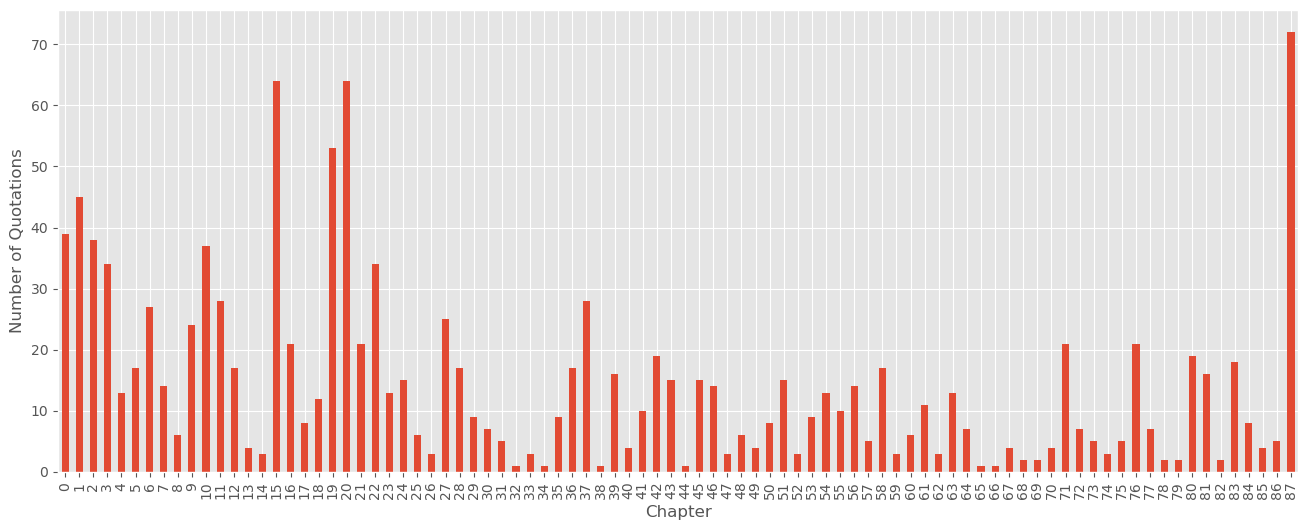

In [247]:
plotSynchronicAnalysis(synchronicAnalysis(victorian_studies_df, useWordcounts=False), useWordcounts=False)

### Diachronic Analysis of Victorianist Journals Quotations

In [248]:
# Weighted by wordcount (by the number of words in the quotation) and normalized by decade(counts are scaled to the maximum value per decade)
VictorianStudiesbooksDiaDF = diachronicAnalysis(victorian_studies_df, decades=(1960, 2020), bins=bookLocations, useWordcounts=True, normalize=True).sort_index()
print('Victorianist Quotations per book, per decade (weighted by length of quotation and normalized by decade):')
VictorianStudiesbooksDiaDF

Victorianist Quotations per book, per decade (weighted by length of quotation and normalized by decade):


0         1         2         3         4         5         6  \
1960  0.0  0.977456  0.861514  0.201288  0.800322  1.000000  0.154589   
1970  0.0  1.000000  0.594525  0.186983  0.226240  0.231921  0.186467   
1980  0.0  0.423432  0.899908  0.212638  0.004151  0.096402  0.105627   
1990  0.0  1.000000  0.717102  0.208744  0.418345  0.150450  0.131162   
2000  0.0  0.705305  1.000000  0.330361  0.357111  0.190370  0.362015   
2010  0.0  0.698289  1.000000  0.442054  0.507090  0.244010  0.345232   

             7         8  
1960  0.457327  0.487923  
1970  0.163223  0.213843  
1980  0.068266  1.000000  
1990  0.096442  0.333048  
2000  0.094516  0.349532  
2010  0.225428  0.900244

In [249]:
VictorianStudiesbooksDiaDF['decade'] = VictorianStudiesbooksDiaDF.index

In [250]:
VictorianStudiesbooksMelted = VictorianStudiesbooksDiaDF.melt(id_vars='decade', var_name='book')

In [251]:
# cut out erroneous "book 0" material (ie title page)
VictorianStudiesbooksMelted = VictorianStudiesbooksMelted[VictorianStudiesbooksMelted.book != 0]

### Victorianist journals: *Middlemarch* quotations per book, per decade (normalized and weighted), heat map
Because our corpus contains [varying numbers of JSTOR texts per decade](#How-many-articles-do-we-have-published-in-each-year?), we've decided to also weigh by length of quotation and normalize per decade.

In [252]:
#Change scale of the circle markers to a threshold scale (and resize to make the steps in the scale more visible)
alt.Chart(VictorianStudiesbooksMelted, title="Victorianist Middlemarch quotations per book, per decade (weighted by length of quotation and normalized by decade)")\
.mark_rect().encode(x=alt.X('book', title="Book", type='ordinal', axis=alt.Axis(labelAngle=0)), 
                    y=alt.Y('decade', title="Decade",type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                                        color=alt.Color('value', legend=alt.Legend(title="Amount Quoted")))\
.properties(width=500, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
) 

alt.Chart(...)

### Victorianist journals: *Middlemarch* quotations per book, per decade (not normalized or weighted)

In [253]:
# Raw quotation counts (not weighted by the number of words in the quoatation or normalized by decade)
# Turning on useWordcounts makes it so that it's weighted by wordcount. Turning it off uses raw numbers of quotations.
VictorianStudiesbooksNotNormalizedNotWeightedDiaDF = diachronicAnalysis(victorian_studies_df, decades=(1960, 2020), bins=bookLocations,\
                                                        useWordcounts=False, normalize=False).sort_index()
print('Number of quotations per book, per decade in Victorianist journals')
VictorianStudiesbooksNotNormalizedNotWeightedDiaDF

Number of quotations per book, per decade in Victorianist journals


0   1   2   3   4   5   6   7   8
1960  0  22  13   6  15  12   4   6   9
1970  0  58  30  11  12  18   9   3  14
1980  0  32  49  15   2   7   8   3  30
1990  0  94  54  24  23  19  11  13  31
2000  0  56  70  17  22  16  21   6  33
2010  0  67  66  30  28  17  26  21  69

In [254]:
VictorianStudiesbooksNotNormalizedNotWeightedDiaDF['decade'] = VictorianStudiesbooksNotNormalizedNotWeightedDiaDF.index

In [255]:
VictorianStudiesbooksNotNormalizedNotWeightedDiaDFMelted = VictorianStudiesbooksNotNormalizedNotWeightedDiaDF.melt(id_vars='decade', var_name='book')

In [256]:
# cut out erroneous "book 0" material (ie title page)
VictorianStudiesbooksNotNormalizedNotWeightedDiaDFMelted = VictorianStudiesbooksNotNormalizedNotWeightedDiaDFMelted[VictorianStudiesbooksNotNormalizedNotWeightedDiaDFMelted.book != 0]

### Victorianist journals: *Middlemarch* quotations per book, per decade (not normalized or weighted), heat map

In [257]:
alt.Chart(VictorianStudiesbooksNotNormalizedNotWeightedDiaDFMelted, title="Victorianist Middlemarch quotations per book, per decade (not weighted or normalized by decade)")\
.mark_rect().encode(x=alt.X('book', title="Book", type='ordinal', axis=alt.Axis(labelAngle=0)), 
                    y=alt.Y('decade', title="Decade",type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                                        color=alt.Color('value', legend=alt.Legend(title="Number of Quotations")))\
.properties(width=500, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
) 

alt.Chart(...)

###  Victorianist journals: *Middlemarch* quotations per chapter, per decade (not normalized or weighted)

In [258]:
# Raw quotation counts (not weighted by the number of words in the quoatation or normalized by decade)
# Turning on useWordcounts makes it so that it's weighted by wordcount. Turning it off uses raw numbers of quotations.
VictorianStudiesdiaDFquoteOnly = diachronicAnalysis(victorian_studies_df, decades=(1960, 2030), bins=chapterLocations, useWordcounts=False, normalize=False).sort_index()
VictorianStudiesdiaDFquoteOnly.columns.name ='chapter'
VictorianStudiesdiaDFquoteOnly.index.name = 'decade'

In [259]:
VictorianStudiesdiaDFquoteOnly

chapter  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  \
decade                                                                        
1960      2   6   1   1   1   1   0   1   1   0   5   1   2   0   0   1   0   
1970      4   7  14   9   5   1   7   4   1   2   1   3   0   0   0   8   0   
1980      7   9   2   3   0   2   1   2   0   0   2   4   0   0   1  10   6   
1990      5   9   7   8   1   8  10   4   1   4  15  14   9   2   1  24   1   
2000      6   3   7   7   4   2   4   2   1  12   7   1   0   0   1  11   4   
2010     11  11   7   3   2   3   5   1   2   5   6   5   6   2   0  10  10   

chapter  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
decade                                                                        
1960      0   0   0   6   4   2   1   1   0   0   2   1   0   1   0   0   0   
1970      1   1   7   8   2   3   0   0   0   1   4   6   0   0   0   0   0   
1980      0   3  11  13   4   1   8   1   0   0   2   1   2   0   0   1   0   
1990      4   2   4  11   2   2   0   2   2   1  11   1   3   1   0   0   3   
2000      0   2  18  12   3  19   0   2   3   1   2   4   0   5   0   0   0   
2010      3   4  11  14   5   7   4   9   1   0   4   3   4   0   5   0   0   

chapter  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  \
decade                                                                        
1960      0   5   0   1   0   2   2   4   1   0   0   0   2   2   1   0   1   
1970      0   0   0   6   0   0   0   2   4   8   0   1   5   1   1   0   1   
1980      0   0   1   1   0   0   0   0   0   2   0   1   0   0   0   0   0   
1990      0   1   9   6   0   3   0   2   2   1   0  10   5   0   0   0   1   
2000      0   0   0   8   1   4   1   0   8   3   1   1   1   0   3   3   2   
2010      1   2   7   4   0   7   1   2   4   1   0   2   0   0   1   0   1   

chapter  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  \
decade                                                                        
1960      1   2   3   1   0   1   0   1   0   0   1   0   0   0   0   0   0   
1970      1   0   0   1   1   5   0   1   0   1   0   0   0   1   0   0   0   
1980      4   0   0   5   1   1   0   0   0   0   0   1   0   2   0   0   0   
1990      1   1   0   0   1   2   1   2   3   0   2   0   4   1   1   0   2   
2000      1   0   1   5   3   1   4   3   0   0   3   2   2   0   0   0   0   
2010      7   0   5   1   4   3   0  10   0   3   5   0   7   3   0   1   2   

chapter  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  \
decade                                                                        
1960      0   0   0   6   0   0   0   0   4   0   0   0   3   0   1   0   0   
1970      0   1   0   1   0   2   1   0   0   0   0   0   1   2   0   1   0   
1980      0   0   0   1   3   0   0   0   5   1   0   0   3   2   0   2   0   
1990      0   0   2   3   0   0   1   0   3   2   0   2   0   2   0   4   3   
2000      2   1   0   1   1   1   0   2   6   1   2   0   0   4   0   5   1   
2010      0   0   1   7   3   2   1   3   2   3   0   0   8   6   1   6   0   

chapter  85  86  87  
decade               
1960      0   0   1  
1970      0   0   7  
1980      4   2   8  
1990      0   2  12  
2000      0   0  10  
2010      0   1  33

In [260]:
VictorianStudiesdiaDFquoteOnly['decade'] = VictorianStudiesdiaDFquoteOnly.index

In [261]:
VictorianStudiesdiaDFquoteOnlyMelted = VictorianStudiesdiaDFquoteOnly.melt(id_vars='decade')

###  Victorianist journals: *Middlemarch* quotations per chapter, per decade (not normalized or weighted), heat map

In [262]:
#Chart with raw quotations
alt.Chart(VictorianStudiesdiaDFquoteOnlyMelted, title="Victorianist Journals Middlemarch quotations per chapter, per decade (not weighted or normalized)")\
.mark_rect().encode(x=alt.X('chapter', title="Chapter", type='ordinal', axis=alt.Axis(labelAngle=0, values=list(range(0, 87, 5)))), 
                    y=alt.Y('decade', title="Decade",type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                                        color=alt.Color('value', legend=alt.Legend(title="Number of Quotations")))\
.properties(width=1000, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
) 

alt.Chart(...)

### Victorianist journals: *Middlemarch* quotations per chapter, per decade (normalized by decade and weighted by word count)

In [263]:
# Weighted by wordcount (by the number of words in the quoatation) and normalized by decade(counts are scaled to the maximum value per decade)
VictorianStudiesnormalizeddiaDF = diachronicAnalysis(victorian_studies_df, decades=(1960, 2020), bins=chapterLocations, useWordcounts=True, normalize=True).sort_index()
VictorianStudiesnormalizeddiaDF.columns.name = 'chapter'
VictorianStudiesnormalizeddiaDF.index.name = 'decade'

In [264]:
VictorianStudiesnormalizeddiaDF

chapter        0         1         2         3         4         5         6   \
decade                                                                          
1960     0.189189  0.263514  0.150901  0.060811  0.020270  0.018018  0.000000   
1970     0.055777  0.362550  1.000000  0.330677  0.138114  0.005312  0.151394   
1980     0.089562  0.202020  0.010774  0.018855  0.000000  0.025589  0.077441   
1990     0.144444  0.386111  0.152778  0.208333  0.009722  0.298611  0.409722   
2000     0.245902  0.142497  0.184111  0.131148  0.031526  0.022699  0.095839   
2010     0.209424  0.228272  0.274346  0.059686  0.023037  0.033508  0.140314   

chapter        7         8         9         10        11        12        13  \
decade                                                                          
1960     0.022523  0.020270  0.000000  0.416667  0.024775  0.180180  0.000000   
1970     0.122178  0.138114  0.120850  0.015936  0.130146  0.000000  0.000000   
1980     0.057239  0.000000  0.000000  0.028283  0.108418  0.000000  0.000000   
1990     0.150000  0.044444  0.131944  0.458333  0.395833  0.456944  0.031944   
2000     0.075662  0.007566  0.486759  0.234552  0.336696  0.000000  0.000000   
2010     0.036649  0.031414  0.055497  0.160209  0.063874  0.179058  0.040838   

chapter        14        15        16        17        18        19        20  \
decade                                                                          
1960     0.000000  0.018018  0.000000  0.000000  0.000000  0.000000  0.849099   
1970     0.000000  0.212483  0.000000  0.009296  0.007968  0.266932  0.798141   
1980     0.006734  0.249158  0.193939  0.000000  0.065993  0.274074  0.408081   
1990     0.036111  1.000000  0.055556  0.102778  0.034722  0.263889  0.711111   
2000     0.015132  0.360656  0.102144  0.000000  0.012610  1.000000  0.421185   
2010     0.000000  0.365445  0.352880  0.036649  0.063874  0.344503  0.515183   

chapter        21        22        23        24        25        26        27  \
decade                                                                          
1960     0.308559  0.029279  0.038288  0.031532  0.000000  0.000000  0.074324   
1970     0.033201  0.200531  0.000000  0.000000  0.000000  0.005312  0.203187   
1980     0.112458  0.003367  0.221549  0.004040  0.000000  0.000000  0.035690   
1990     0.041667  0.038889  0.000000  0.077778  0.036111  0.005556  0.351389   
2000     0.108449  0.808323  0.000000  0.026482  0.143758  0.011349  0.012610   
2010     0.330890  0.091099  0.037696  0.463874  0.004188  0.000000  0.063874   

chapter        28        29        30        31        32        33        34  \
decade                                                                          
1960     0.121622  0.000000  0.015766  0.000000  0.000000  0.000000  0.000000   
1970     0.272244  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1980     0.005387  0.017508  0.000000  0.000000  0.026263  0.000000  0.000000   
1990     0.006944  0.076389  0.005556  0.000000  0.000000  0.116667  0.000000   
2000     0.593947  0.000000  0.146280  0.000000  0.000000  0.000000  0.000000   
2010     0.059686  0.202094  0.000000  0.115183  0.000000  0.000000  0.052356   

chapter        35        36        37       38        39        40        41  \
decade                                                                         
1960     0.256757  0.000000  0.027027  0.00000  0.074324  0.096847  0.367117   
1970     0.000000  0.000000  0.175299  0.00000  0.000000  0.000000  0.156707   
1980     0.000000  0.003367  0.002694  0.00000  0.000000  0.000000  0.000000   
1990     0.025000  0.376389  0.359722  0.00000  0.109722  0.000000  0.123611   
2000     0.000000  0.000000  0.491803  0.03657  0.109710  0.006305  0.000000   
2010     0.082723  0.190576  0.080628  0.00000  0.350785  0.039791  0.176963   

chapter        42        43        44        45        46        47        48  \
decade                           

In [265]:
VictorianStudiesnormalizeddiaDF['decade'] = VictorianStudiesnormalizeddiaDF.index

In [266]:
VictorianStudiesnormalizeddiaMelted = VictorianStudiesnormalizeddiaDF.melt(id_vars='decade')

### Victorianist journals: *Middlemarch* quotations per chapter, per decade (normalized and weighted), heat map

Because our corpus contains [varying numbers of JSTOR texts per decade](#How-many-articles-do-we-have-published-in-each-year?), we've decided to also weigh by length of quotation and normalize per decade.

In [267]:
diachronic_chap_victorianist = alt.Chart(VictorianStudiesnormalizeddiaMelted, title="Victorianist Journals Middlemarch quotations per chapter, per decade (normalized by decade and weighted by word count)")\
.mark_rect().encode(x=alt.X('chapter', title="Chapter", type='ordinal', axis=alt.Axis(labelAngle=0, values=list(range(0, 87, 5)))), 
                    y=alt.Y('decade', title="Decade",type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                                        color=alt.Color('value', legend=alt.Legend(title="Amount Quoted")))\
.properties(width=1000, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
)
diachronic_chap_victorianist

alt.Chart(...)

In [ ]:
alt.Chart(VictorianStudiesnormalizeddiaMelted, )\
.mark_rect().encode(x=alt.X('chapter', title="Chapter", type='ordinal', axis=alt.Axis(labelAngle=0, values=list(range(0, 87, 5)))), 
                    y=alt.Y('decade', title="Decade",type='ordinal', sort='descending', 
                                                            axis=alt.Axis(labelExpr='datum.value + "s"')), 
                                        color=alt.Color('value', legend=alt.Legend(title="Amount Quoted")))\
.properties(width=1000, height=300).configure_legend(
titleFontSize=14,
labelFontSize=14
).configure_axis(
titleFontSize=14,
labelFontSize=14
).save('Figure-7.png', ppi=300)

### Most Distinctive Words: Victorianist Journals vs. Non-Victorianist Journals

How does the quoted language and the scholarly discourse around quotation compare in Victorianist versus Non-Victorianist journals?

For analysis, see: [https://lit-mod-viz.github.io/middlemarch-critical-histories/jstor-journal-MDWs.html](https://lit-mod-viz.github.io/middlemarch-critical-histories/jstor-journal-MDWs.html). 

Downloadable notebook: [https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/notebooks/jstor-journal-MDWs.ipynb](https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/notebooks/jstor-journal-MDWs.ipynb)

For list of Victorianist journals, see: [Statistics on Victorianist journals in the dataset](#Statistics-on-Victorianist-journals-in-the-dataset).

# Evaluation

## Generating samples of dataset for evaluating the precision and recall of text matcher
First, we're going to generate a smaller sample dataset, which we'll then perform bootstrapping on.

First, let's stratify our dataset by year, and then take a random sample in that year.

In [ ]:
articlesWithMatches1960_2015 = articlesWithMatches[articlesWithMatches['Decade'] >= 1960]
len(articlesWithMatches1960_2015)

In [ ]:
len(articlesWithMatches1960_2015['year'].value_counts())

### Generate random sample

In [ ]:
sampleData = articlesWithMatches1960_2015.sample(n=56, random_state=56)
sampleData['journal'].value_counts(sort=False)

In [ ]:
sampleData.to_csv('../data/sample_dataset.csv', encoding='utf-8')

In [ ]:
# Function to loop over each row, extracting locations in A and metadata, then output that to a new text file
def extractSampleDataMatches(sampleData):
    for i, row in sampleData.iterrows():
        title = row['title']
        year = row['year']
        # Print a break between each article
        with open('../data/sample-data-matches.txt', "a") as f:
            print("---------------------------------------\n", file=f)
            print(title, file=f)
            print(year, file=f)
        # For each pair of locations in the "Locations in A" column, iterate over, printing the location indexes
        # Followed by the text of the match
            for pair in row['Locations in A']:
                print(f"Location in A: {pair}", file=f)
                print(mm[pair[0]:pair[1]]+"\n", file=f)
    
extractSampleDataMatches(sampleData)

## Link to evaluation metrics notebook

For evaluation metrics and hand verification of results, see:

Downloadable notebook:[https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/notebooks/evaluation-metrics-notebook.ipynb](https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/notebooks/evaluation-metrics-notebook.ipynb)


## Figures for "What We Quote: Disciplinary History and the Textual Atmospheres of *Middlemarch*" article

Visualizations draw on the following datasets:

+ *Victorian Studies* author and title data:
    + [https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/data/VS-author-term_frequencies.csv](https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/data/VS-author-term_frequencies.csv)
    + [https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/data/VS-title-term_frequencies.csv](https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/data/VS-title-term_frequencies.csv)
+ Text-matcher dataset:
    + [https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/data/t2-c3-n2-m3-no-stops.json](https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/data/t2-c3-n2-m3-no-stops.json)
    + [https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/data/matches.csv](https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/data/matches.csv)
+ List of journals classified Victorianist:
    + [https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/data/list-of-Victorianist-journals.csv](https://github.com/lit-mod-viz/middlemarch-critical-histories/blob/master/data/list-of-Victorianist-journals.csv)
    

### Figure 1
#### Frequency of author references in *Victorian Studies*
See link to [Figure 1 context](#Most-frequent-author-references-in-Victorian-Studies,-line-chart) and [data](#Most-frequent-author-references-in-Victorian-Studies) for more details. [Color version of Figure 1](#Most-frequent-author-references-in-Victorian-Studies,-line-chart-(color)).

In [268]:
auth_chart

alt.LayerChart(...)

### Figure 2
#### Frequency of novel title references in *Victorian Studies*
See link to [Figure 2 context](#Most-frequent-title-references-in-Victorian-Studies,-line-chart) and [data](#Most-frequent-title-references-in-Victorian-Studies) for more details. [Color version of Figure 2](#Most-frequent-title-references-in-Victorian-Studies,-line-chart-(color))

In [269]:
title_chart

alt.LayerChart(...)

### Figure 3
#### *Middlemarch* quotations by chapter

See link to [Figure 3 context](#Number-of-quotations,-by-chapter-in-Middlemarch,-bar-chart) and [data](#Number-of-quotations,-by-chapter-in-Middlemarch) for more details.

In [270]:
quotes_per_chap

alt.Chart(...)

### Figure 4
#### Rank-frequency distribution of quotations from *Middlemarch* by chapter.

The ten most frequently quoted chapters, starting from the far left of the graph, are 20, 15, 1, 87 [Finale], 0 [Prelude], 3, 19, 10, 81, and 2. See link to [Figure 4 context](#Number-of-quotations,-by-chapter-in-Middlemarch,-bar-chart-(ranked-by-frequency)) and [data](#Number-of-quotations,-by-chapter-in-Middlemarch) for more details.

In [271]:
ranked_freq_chap

alt.Chart(...)

### Figure 5
#### *Middlemarch* quotations by chapter (normalized), diachronic heatmap
See link to [Figure 5 context](#Middlemarch-quotations-per-chapter,-per-decade-(normalized-and-weighted),-heat-map) and [data](#Number-of-quotations-per-chapter,-per-decade-(normalized-by-decade-and-weighted-by-word-count)) for more details.

In [272]:
diachronic_chap

alt.Chart(...)

### Figure 6
#### Number of quotations per *Middlemarch* chapter, by decade

Note: Chapter 0 and 87 refer to the Prelude and Finale, respectively. Chapters not among the top five are represented in light-gray.

See link to [Figure 6 context](#Middlemarch-top-5-most-frequently-quoted-chapters,-line-chart) and [data](#Number-of-quotations-per-chapter,-per-decade-(not-normalized-or-weighted)) for more details. [Color version of Figure 6](#Middlemarch-top-5-most-frequently-quoted-chapters,-line-chart-(color)).

In [273]:
top5_chart

alt.LayerChart(...)

### Figure 7
#### *Middlemarch* quotations by chapter(normalized), Victorianist journals only, diachronic heatmap

For a complete list of journals classified as "Victorianist", see: [Statistics on Victorianist journals in the dataset](#Statistics-on-Victorianist-journals-in-the-dataset).

See link to [Figure 7 context](#Victorianist-journals:-Middlemarch-quotations-per-chapter,-per-decade-(normalized-and-weighted),-heat-map) and [data](#Victorianist-journals:-Middlemarch-quotations-per-chapter,-per-decade-(normalized-by-decade-and-weighted-by-word-count)) for more details.



In [274]:
diachronic_chap_victorianist

alt.Chart(...)

Copyright (c) Sierra Eckert and Milan Terlunen